# Credit Card Fraud Detection System Using ML and DL Models 

### Problem Statement:

<p>
    We have much research that are going in this field and we many more existing systems in the same idea with good models and with high accuracies. In this System I have included some economic parameters like Margins, Chargeback, Lost (False Positives), True Positives such as no lost customers. Considering these parameters in the Net Gain for creating a new formula with the existing features in the dataset and these economical parameters and to choose the model with all these factors to select a model which is economically feasible for both the credit card company and other companies who are using the algorithms.
</p>




---------------------------------------------------------------------------------------------------------------------------

[Credit Card Fraud Detection at Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

#### About

<p>
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable, and it takes value 1 in case of fraud and 0 otherwise

</p>


---------------------------------------------------------------------------------------------------------------------------

### In this process of Model Building I am including various ML and DL Models and with three different Approach to the problem

---------------------------------------------------------------------------------------------------------------------------

**1. In the 1st Approach we are going to use the coorelation matrix there by finding the less important features or features that there by decrease the accuracy of the model. The Models we are going to build are with hyper parameters like we have SVM here we can include SVM with different hyperparameters like 10,0.1,0.01**

---> The Models that we are going to use are

a. SVM

b. LR

c. XGBoost

d. Autoencoder with XGBoost

e. Neural Network with 2 layers

f. Stacking

After that there by comparing all these model by getting the best models and then comparing the models with other approaches

**2. In the 2nd Approach we are going to SMOTE feature selection technique for overcoming overfitting by synthetically oversampling minority class labels and is successful to a great degree**

---> The Models that we are going to use in this approach are

a. SGD Classifier

b. LR

c. RF

d. KNN

**3. In the 3rd Approach we are building the neural network with 4 layers**




<br>

This notebook optimizes the economic objective **for the merchants** since they carry the eventual economic cost of fraud. The economic objectives for a bank or a credit card operator may be different. 

For the merchant, the Net Gain (total economic effect) from the fraud detector has 2 components:
1. For each correctly identified fraud (True Positives), the merchant saves the marginal cost of goods sold (COGS) per unit + chargeback(dispute) fee. Chargeback fees can be large (€15 and more), which is significant compared to a median transaction of €22
2. For each incorrectly blocked legitimate transaction (False Positives), the merchant loses the net margin per unit, but only for those FP that are not eventually recovered (eg customer calling to unblock) and are truly lost business. In addition, there are potential extra costs (externalities) such as annoyed customers switching to competitors

<br>


Each classifier (filter) below finds the optimal sensitivity to maximize the Net Gain:

![alt text](https://drive.google.com/uc?id=1WC4nKQ_8raXd4QKstLq3Op5zeVHIGTSe)

Assumptions:
- Margins:   5%, 20%
- Chargeback: flat €15 per transaction
- Lost, the share of FP that do not recover = 50%
- TP externalities such as lost customers = 0    






### Importing Libraries

In [311]:
import pandas as pd
import numpy as np

import scipy
import math
import time
import random

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot 
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore')

from typing import Tuple

In [312]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_learning_curves
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, confusion_matrix, classification_report,roc_curve, roc_auc_score, average_precision_score,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.metrics import average_precision_score, precision_recall_curve
from scikitplot.metrics import auc, plot_precision_recall_curve
from sklearn.preprocessing import RobustScaler


In [313]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [314]:
SEED=2020
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [315]:
df = pd.read_csv('creditcard.csv')
print(df.shape)

(284807, 31)


In [316]:
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
211253  138331.0 -0.424849  1.440450  1.144727  2.770542  1.274736 -0.266094   
216519  140515.0  1.923825 -0.285707 -1.730333 -0.046817  1.372527  1.705817   
280714  169705.0  1.928541 -0.338794 -0.773928  1.023823  0.027824  0.601129   
92856    64140.0  0.990399 -0.162846  1.256590  1.277200 -0.825194  0.305162   
168088  119061.0  1.777328 -0.153731  0.443905  3.522905 -0.299301  1.604670   

              V7        V8        V9  ...       V21       V22       V23  \
211253  1.160302 -0.151599 -1.942956  ...  0.270038  0.812179 -0.253067   
216519 -0.140174  0.363828  0.511349  ... -0.173432 -0.196649  0.340552   
280714 -0.608708  0.282794  0.857511  ...  0.156631  0.482619  0.086723   
92856  -0.672139  0.328584  0.567870  ...  0.194705  0.538353  0.071150   
168088 -1.216280  0.615849 -0.005621  ...  0.233492  0.552009  0.197448   

             V24       V25       V26       V27       V28  Amount  Class  
211253  0.072351 -0.149161  0.011216  0.139467  0.183261    1.71      0  
216519 -1.285473 -0.372171  0.412211 -0.005250 -0.075931   10.60      0  
280714 -0.016709 -0.023490 -0.589910  0.033751 -0.042676   25.00      0  
92856   0.061135  0.104104 -0.323222  0.082969  0.041972   45.00      0  
168088  0.020809 -0.479260 -0.041677  0.024602 -0.023316   37.83      0  

[5 rows x 31 columns]

### Explorartory Data Analysis and Preprocessing of Data

In [317]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [318]:
print(df.Class.value_counts())
print(f'{df.Class.mean():.6f}  {1/df.Class.mean():.1f}')

0    284315
1       492
Name: Class, dtype: int64
0.001727  578.9


In [319]:
# economic parameters
MARGIN      = 0.20
CHARGEBACK  = 15
LOST        = 0.5
EXT         = 0

In [320]:
total_amount = df.Amount.sum()
fraud_amount = df.Amount[df.Class==1].sum()

# net loss if no fraud filter is installed:
net_loss = (1-MARGIN)*sum(df.Amount[df.Class==1]) + CHARGEBACK*sum(df.Class)

print(f'Total amount:           € {total_amount:,.0f}')
print(f'Total amount of fraud:  € {fraud_amount:,.0f}     {100*fraud_amount/total_amount:.3f}% of total')
print(f'Net loss if no filter:  € {net_loss:,.0f}')

Total amount:           € 25,162,590
Total amount of fraud:  € 60,128     0.239% of total
Net loss if no filter:  € 55,482


In [321]:
def countplot_data(data, feature):
    
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    
    sns.FacetGrid(data, hue=target, size=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

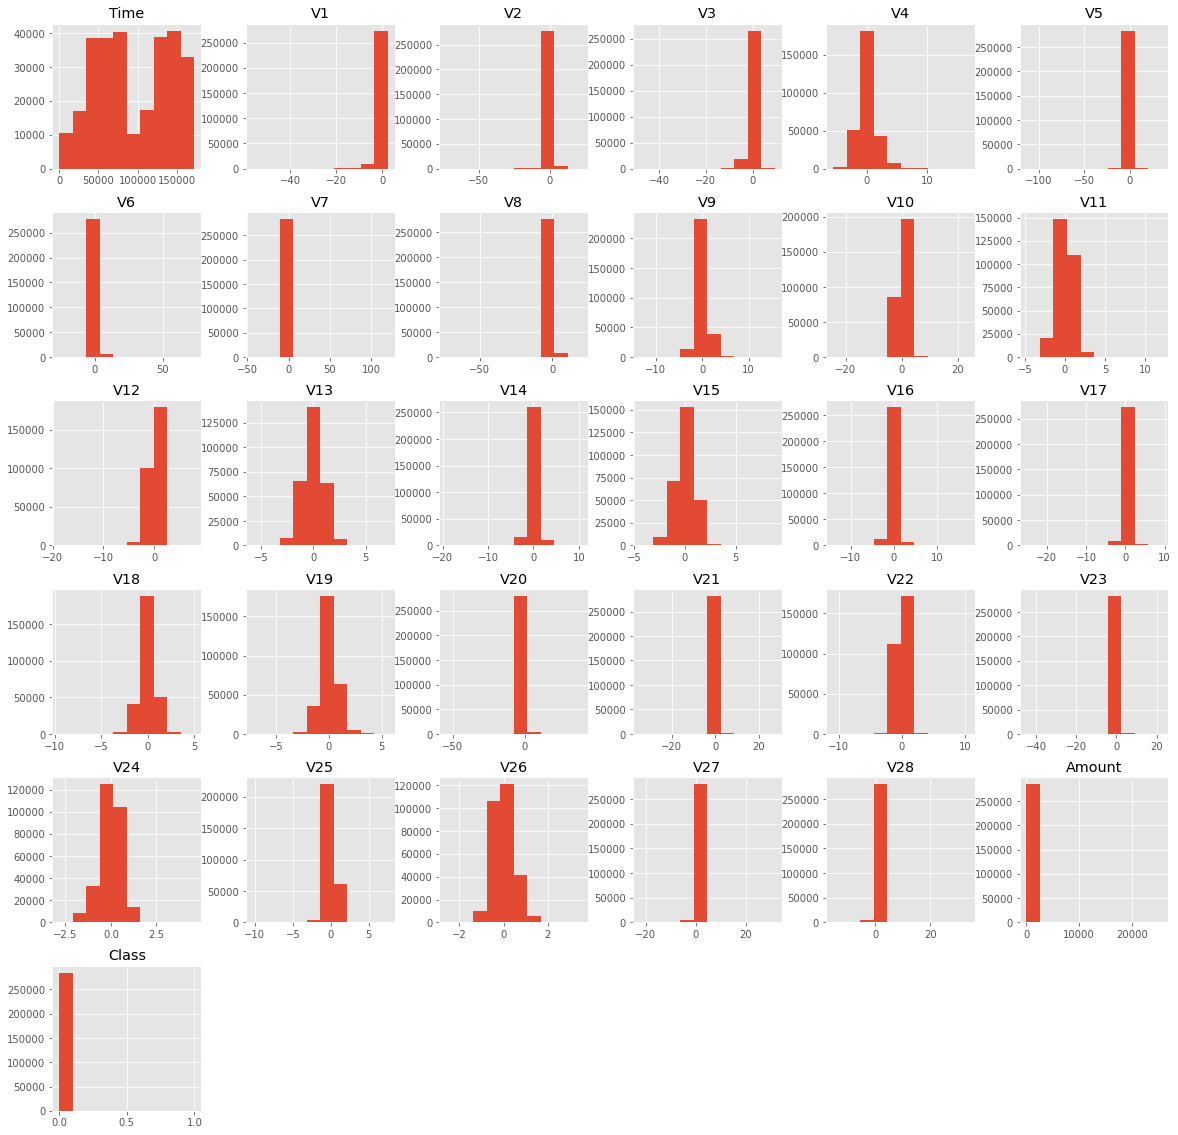

In [322]:
df.hist(figsize = (20, 20))
plt.title("Histogram plot for all the featues avilable in the dataset")
plt.show()

Text(0.5, 1.0, 'Class Comparision Graph')

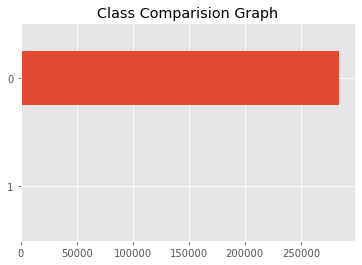

In [323]:
df['Class'].value_counts().sort_values().plot(kind = 'barh');
plt.title('Class Comparision Graph')

In [324]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 0.98, 'Pairplot for the features V1 V2 V3 V4 V5 V6 V7 V8 V9 V10')

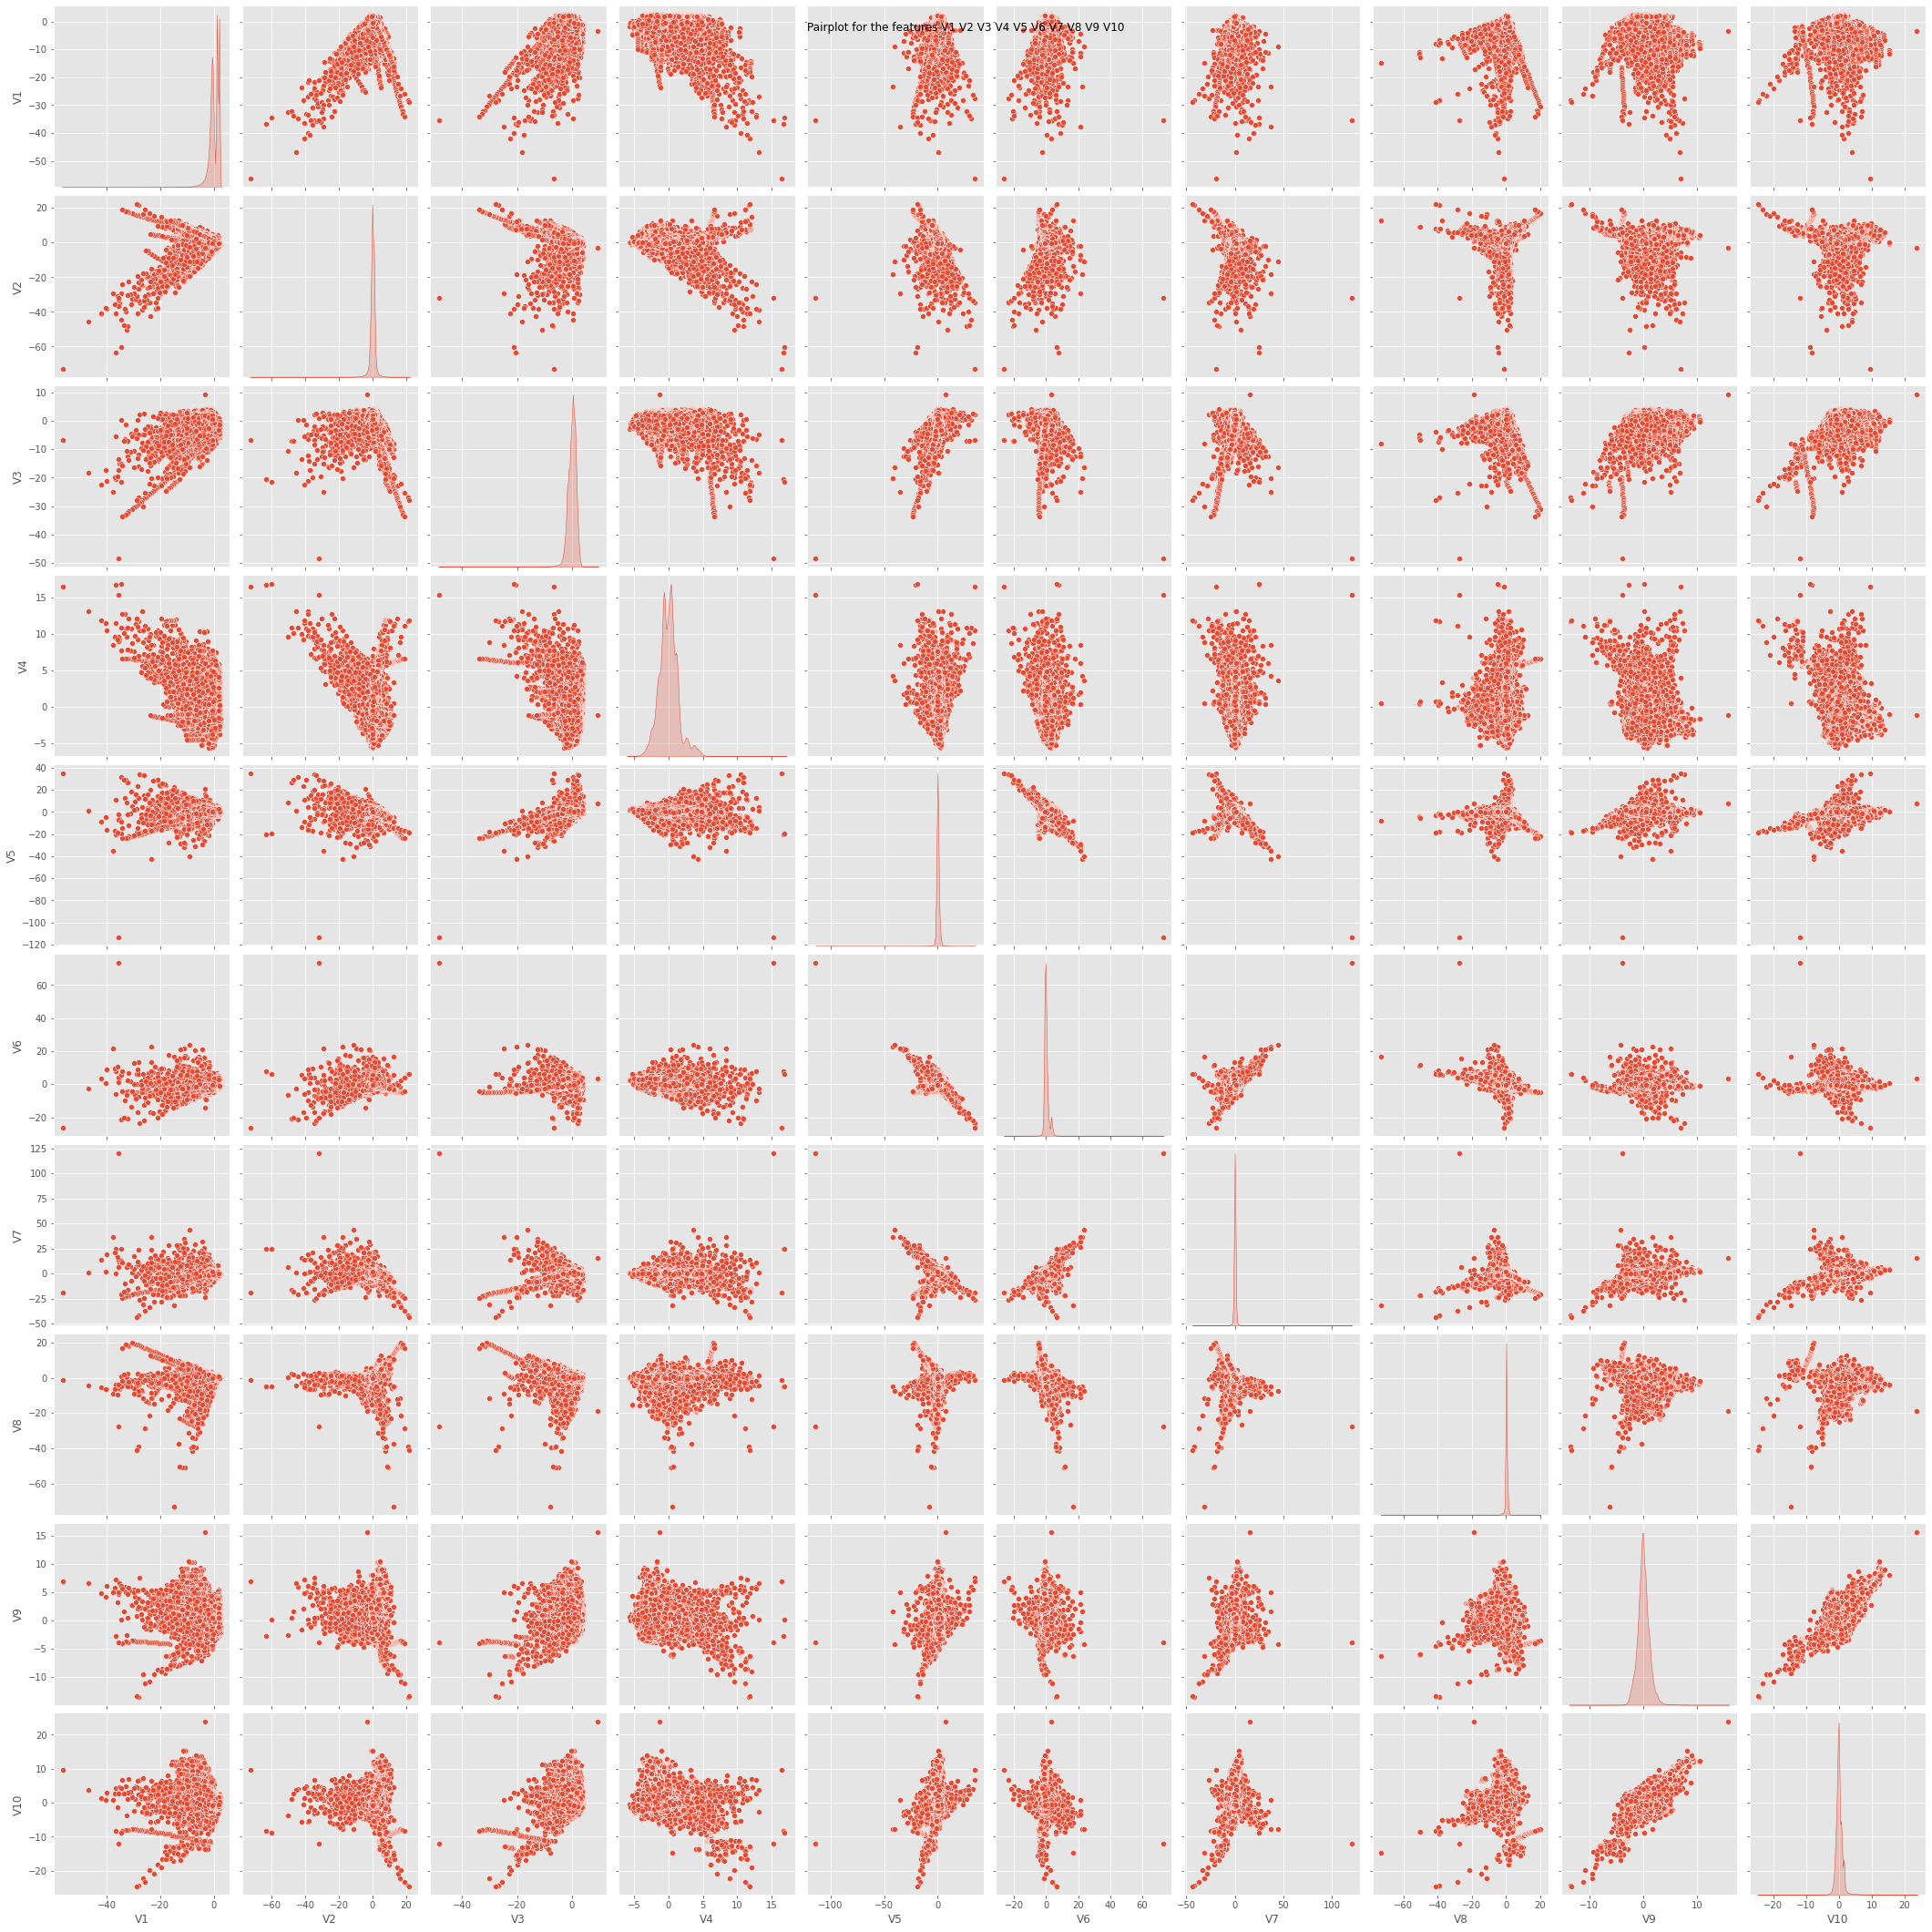

In [325]:
graph = sns.pairplot(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']], diag_kind="kde", height=3)
graph.fig.suptitle("Pairplot for the features V1 V2 V3 V4 V5 V6 V7 V8 V9 V10")

Text(0.5, 0.98, 'Pairplot for the features V11 V12 V13 V14 V15 V16 V17 V18 V19 V20')

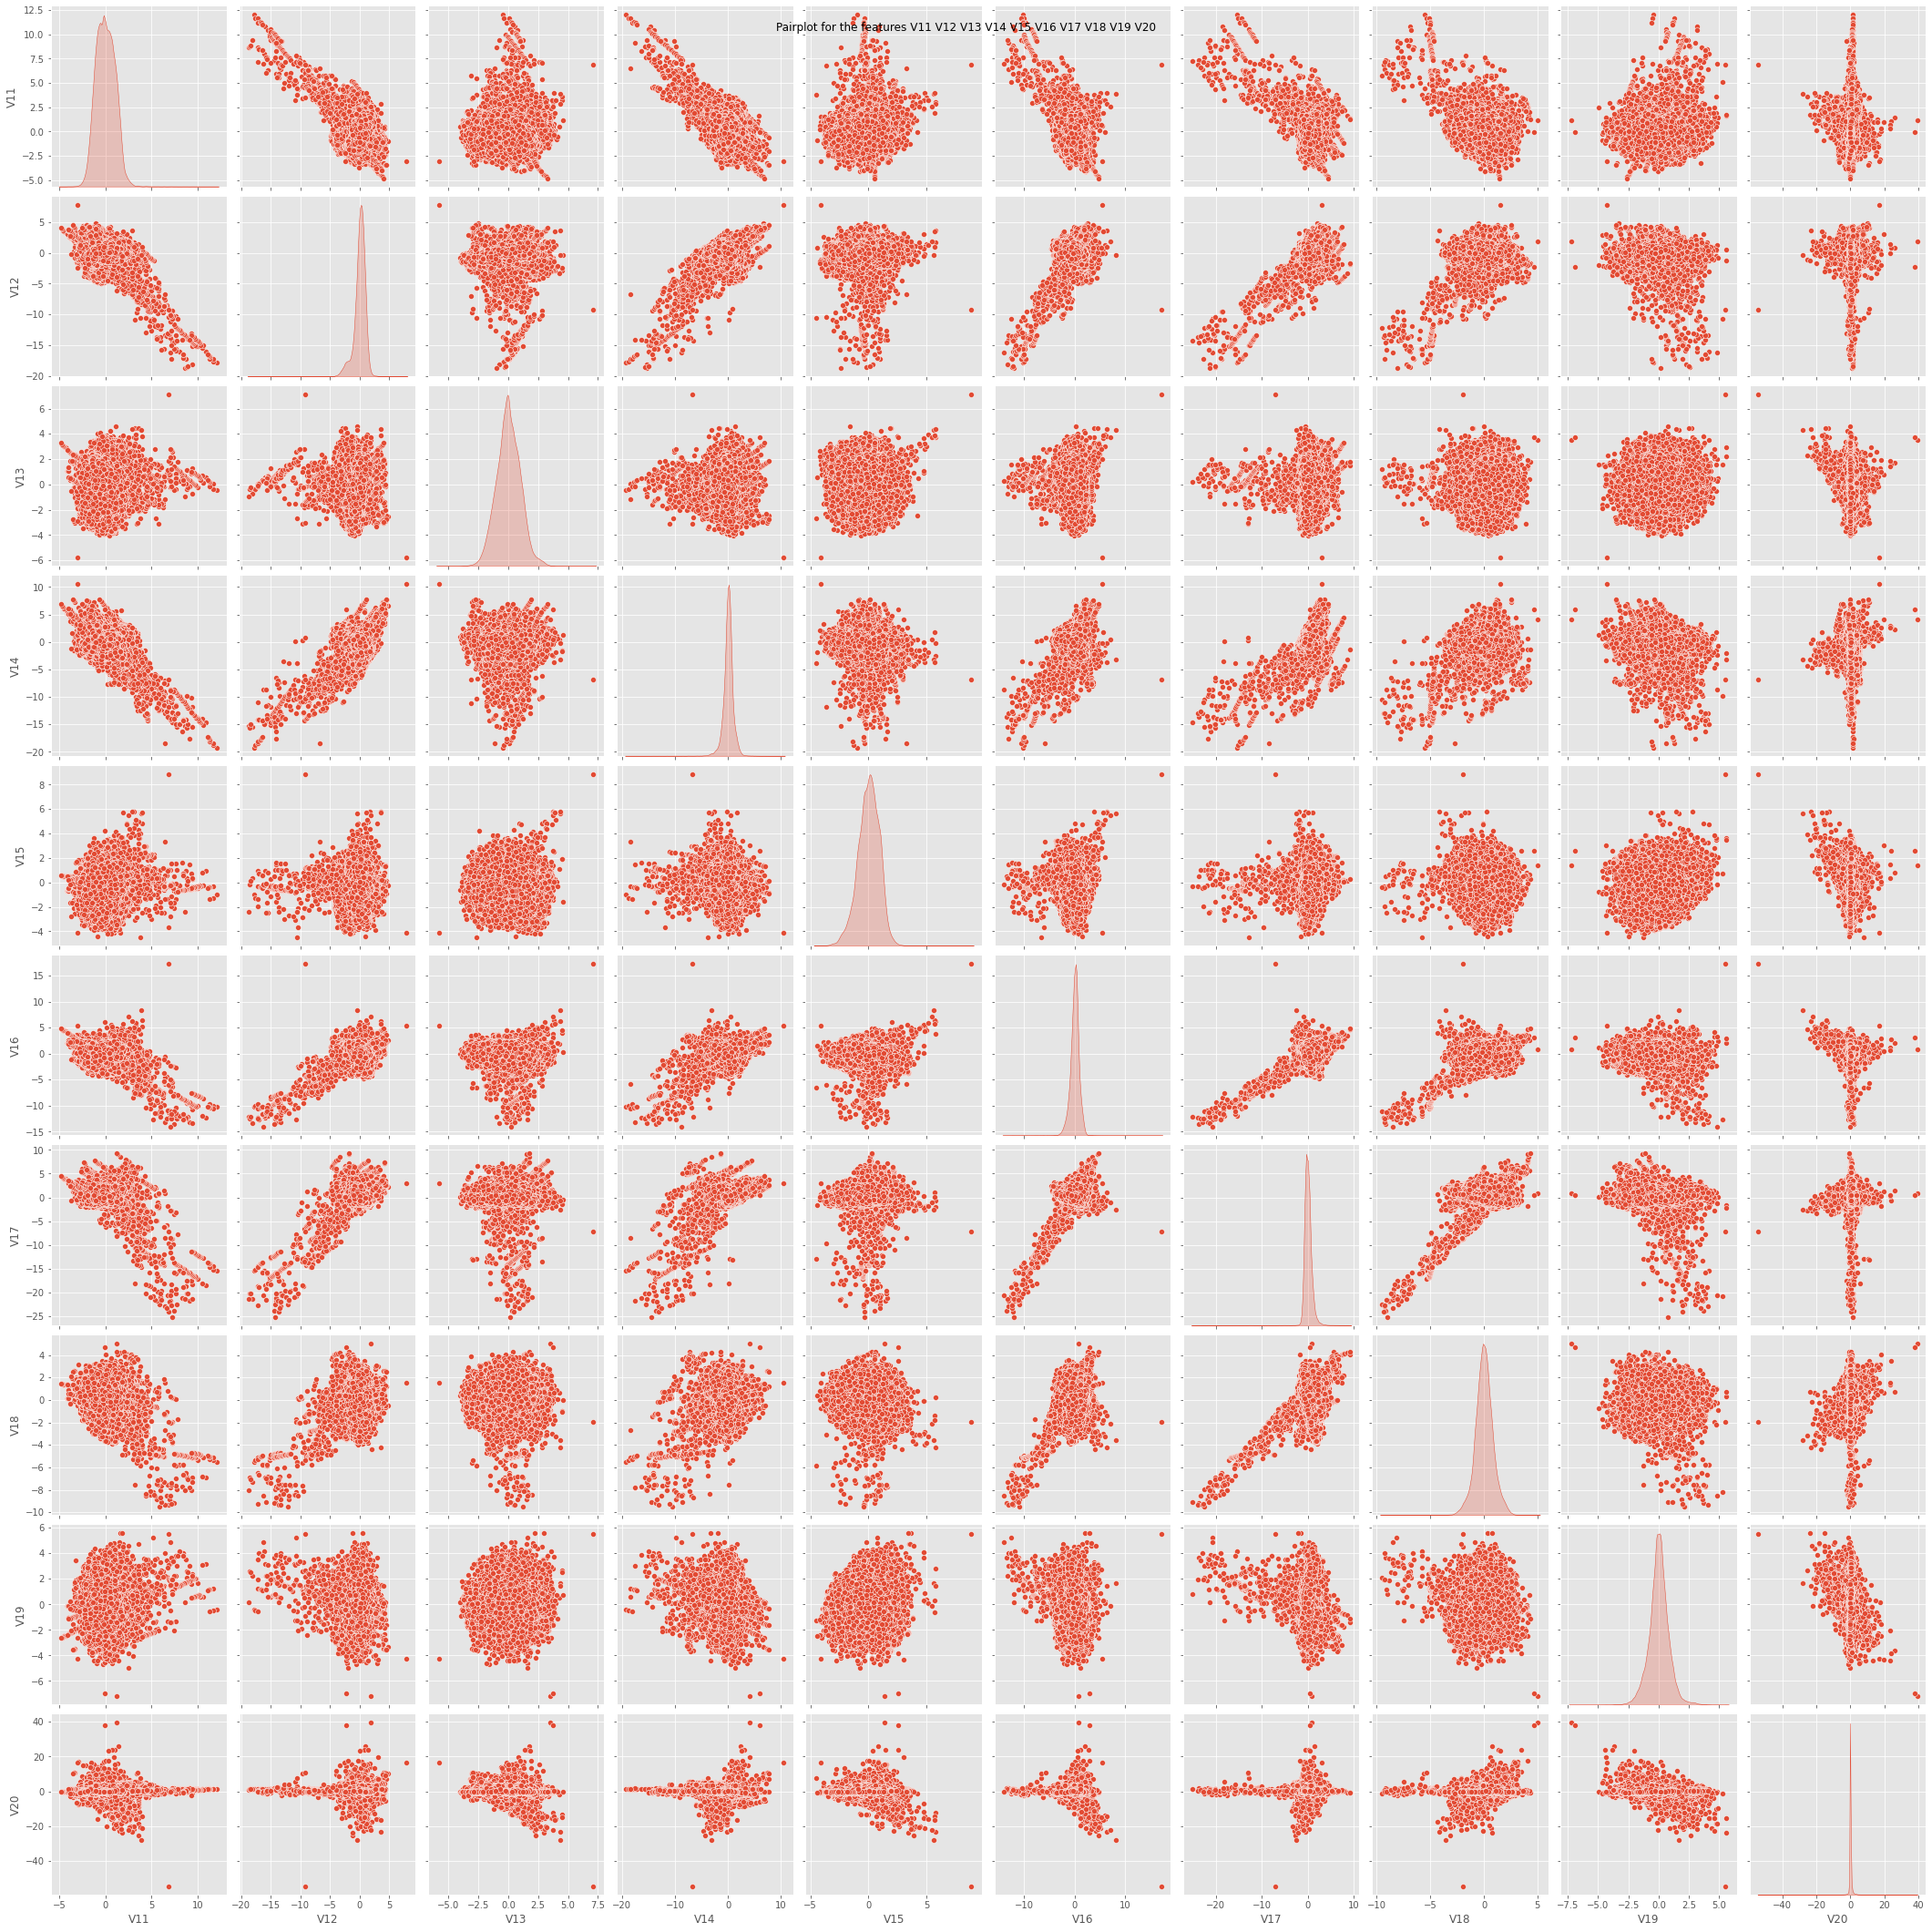

In [326]:
graph1 = sns.pairplot(df[['V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']], diag_kind="kde", height=3)
graph1.fig.suptitle("Pairplot for the features V11 V12 V13 V14 V15 V16 V17 V18 V19 V20")

Text(0.5, 0.98, 'Pairplot for the features V21 V22 V23 V24 V25 V26 V27 V28 Amount Class')

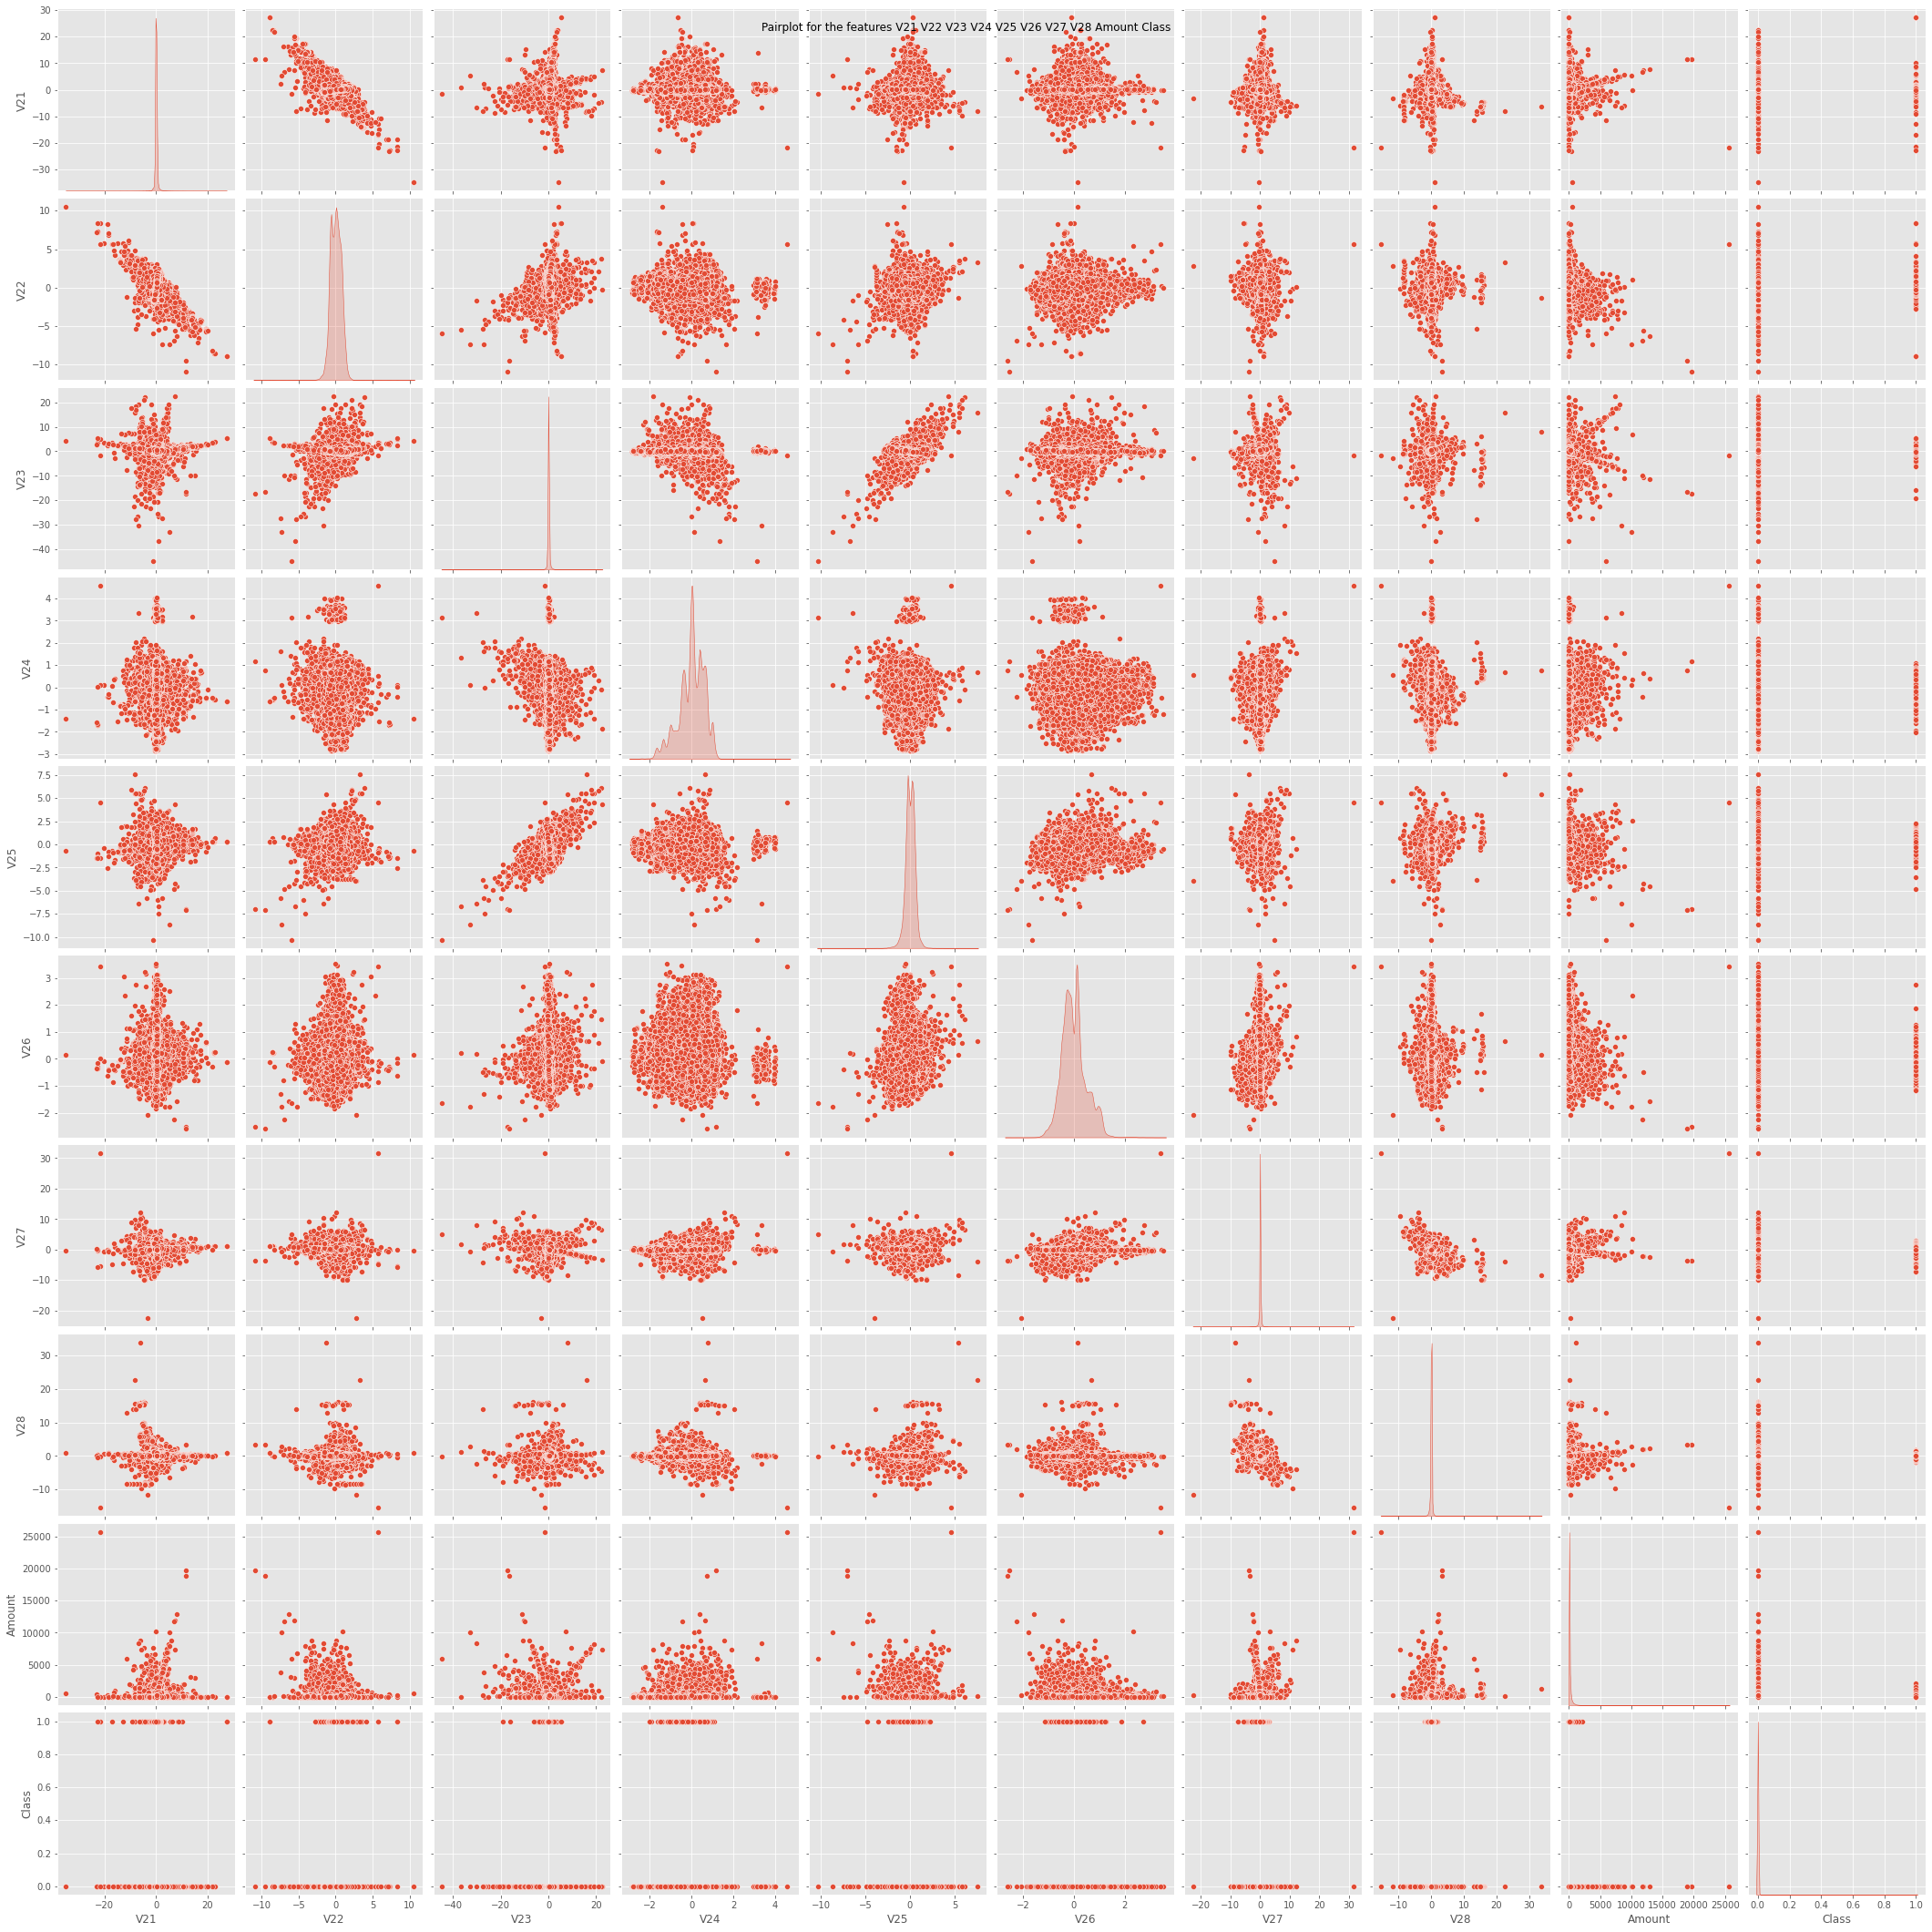

In [327]:
graph2 =sns.pairplot(df[['V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']], diag_kind="kde", height=3)
graph2.fig.suptitle("Pairplot for the features V21 V22 V23 V24 V25 V26 V27 V28 Amount Class")

In [328]:
train_stats = df.describe()
train_stats.pop("Class")
train_stats = train_stats.transpose()
train_stats

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000

What is relationship of fraud transactions with amount of money?
Let us try to determine the nature of transactions which are fraud and obtain a relevant set of the same with respect to their amount.

We hypothesise based on our scatter plot that all fraud transactions occur for an amount less than 2500.

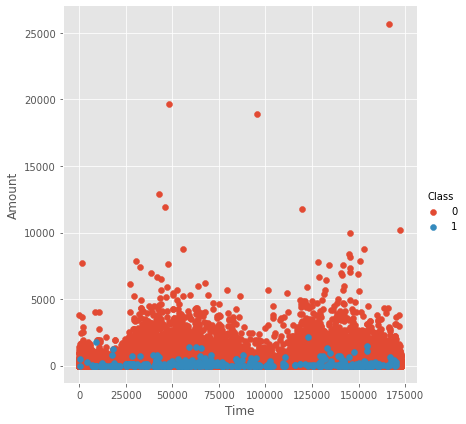

In [329]:
pairplot_data_grid(df, "Time", "Amount", "Class")

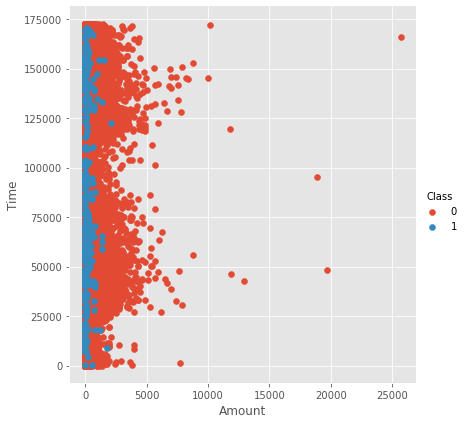

In [330]:
pairplot_data_grid(df, "Amount", "Time", "Class")

Insights:

It can be observed that the fraud transactions are generally not above an amount of 2500.

It can also be observed that the fraud transactions are evenly distributed about time.

In [331]:
amount_more = 0
amount_less = 0
for i in range(df.shape[0]):
    if(df.iloc[i]["Amount"] < 2500):
        amount_less += 1
    else:
        amount_more += 1
print(amount_more)
print(amount_less)

449
284358


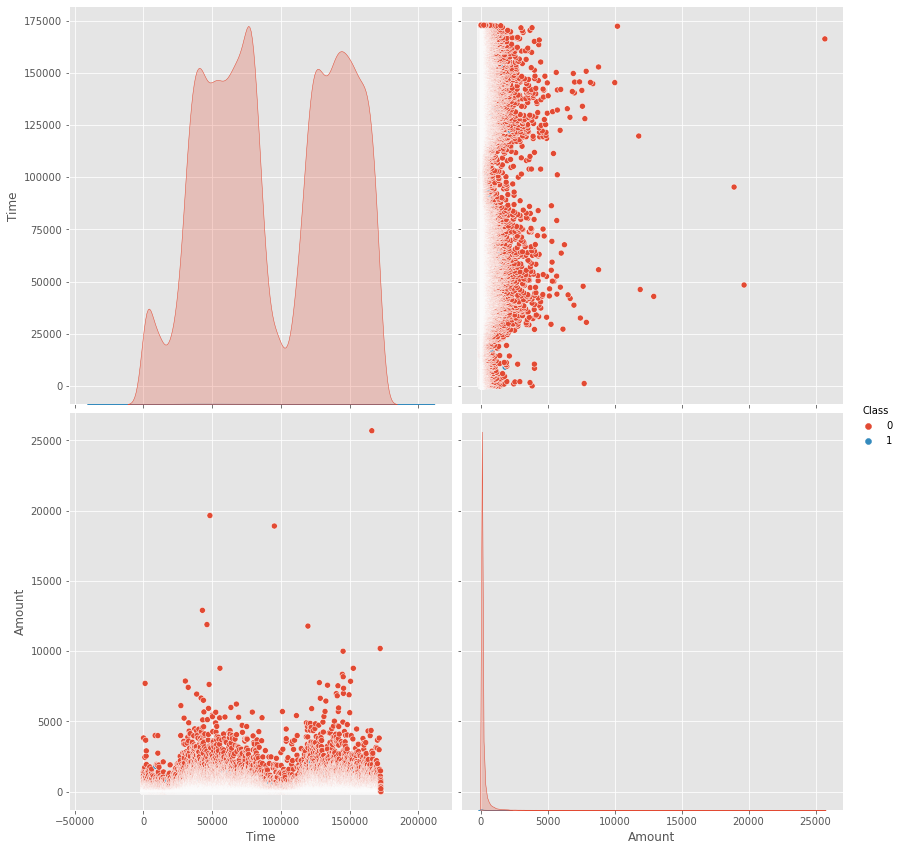

In [332]:
df_refine = df[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=6)
plt.show()

In [333]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Thus, we can conclude that since the number of fraud transaction below the amount of 2500 is same as the number of total fraud transactions. Hence, all fraud transactions are less than 2500.

### Relationship between Time and Transactions?

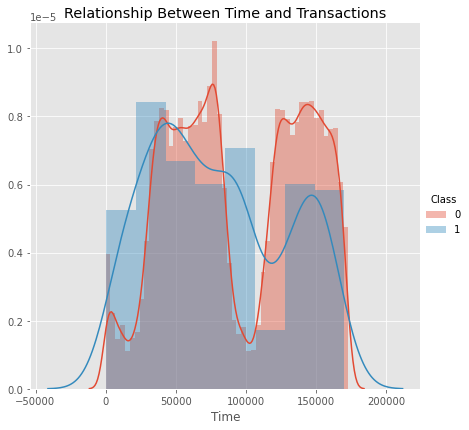

In [334]:
sns.FacetGrid(df_refine, hue="Class", size=6).map(sns.distplot,"Time").add_legend()
plt.title('Relationship Between Time and Transactions')
plt.show()

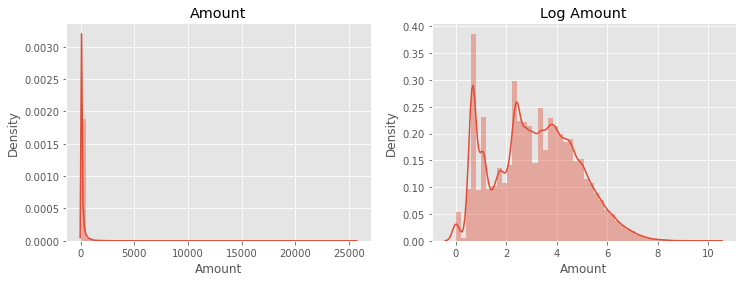

In [335]:
_, (ax0,ax1) = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(df.Amount, ax=ax0)
ax0.set_title('Amount')
sns.distplot(np.log1p(df.Amount), ax=ax1)
ax1.set_title('Log Amount')
plt.show()

In [336]:
df['logamount'] = np.log1p(df.Amount)
df.Time = df.Time/86_400

In [337]:
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
228026  1.682037  0.459711  1.320846  0.198472  4.616557  0.127274  1.255800   
75832   0.651308 -0.361501  0.981428  0.850195  0.729616  0.147607 -0.227926   
242811  1.755382 -1.095266 -0.022863  0.891870 -3.399573  1.130284  4.255068   
97921   0.768993  0.003842  0.047011  0.367682 -2.008896  0.293528 -0.331976   
45564   0.490799  1.377375 -1.275557  0.752324 -1.357240 -1.961013 -0.747075   

              V7        V8        V9  ...       V22       V23       V24  \
228026 -1.094343 -2.465487 -1.988245  ...  1.402564 -0.184959 -0.339276   
75832   0.780035 -0.027560 -0.643813  ...  0.504925 -0.075203  0.017612   
242811 -1.557874  1.792778 -0.644386  ...  1.012257 -0.375939  0.730568   
97921   0.394356 -0.102658 -1.550192  ...  1.066429 -0.073803 -0.667590   
45564  -1.256052  0.053464 -1.735192  ... -0.730233  0.184129  0.428006   

             V25       V26       V27       V28  Amount  Class  logamount  
228026  0.354032  0.700116  0.176191  0.302403   10.62      0   2.452728  
75832  -0.088984 -0.320768  0.237501  0.107966   49.15      0   3.915019  
242811  0.575140 -0.010707  0.205619  0.056808    0.02      0   0.019803  
97921  -0.704712 -0.430117  0.198688  0.209581   39.63      0   3.704507  
45564  -0.001770 -0.437295  0.020919  0.023623   47.40      0   3.879500  

[5 rows x 32 columns]

Visualize the features

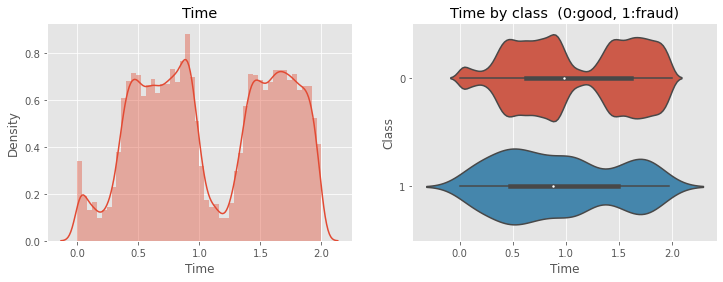

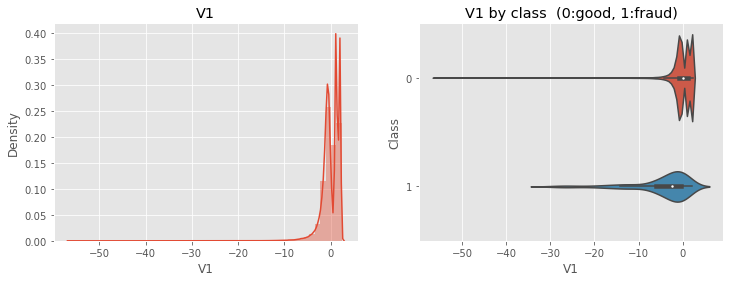

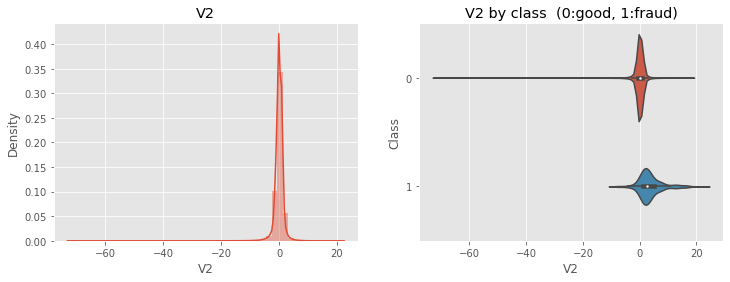

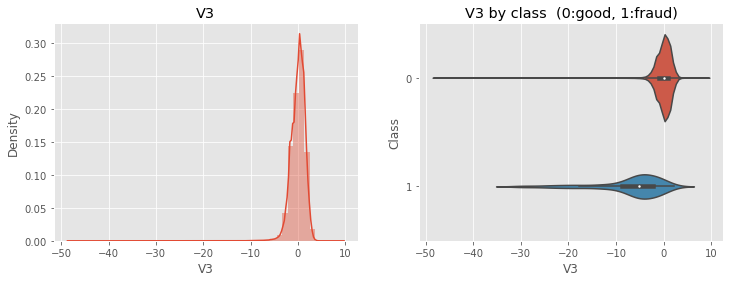

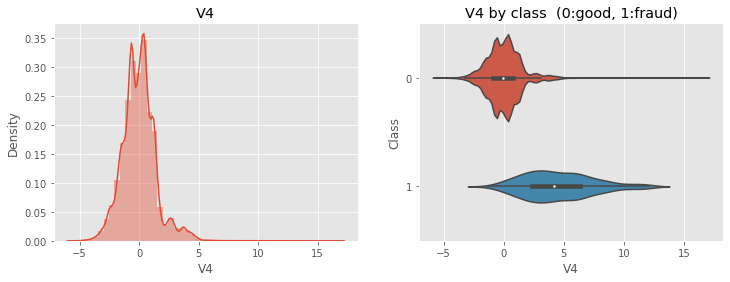

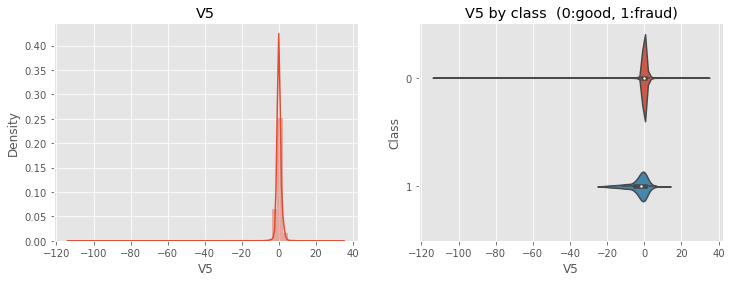

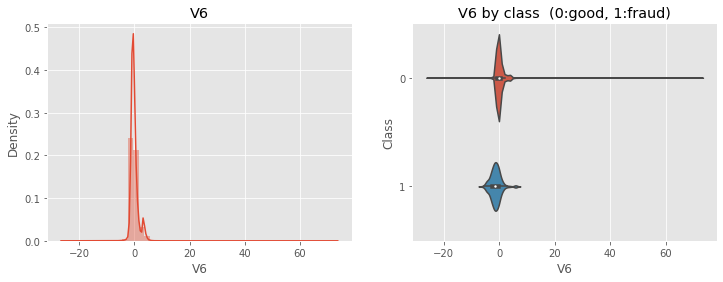

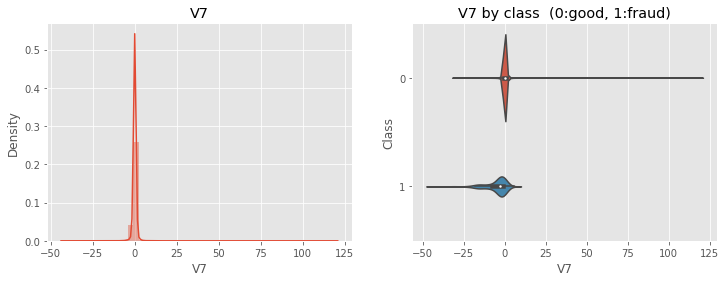

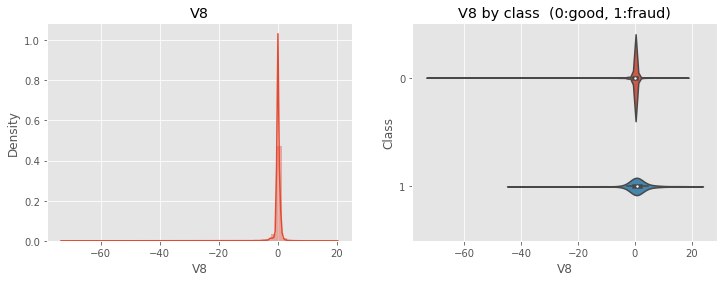

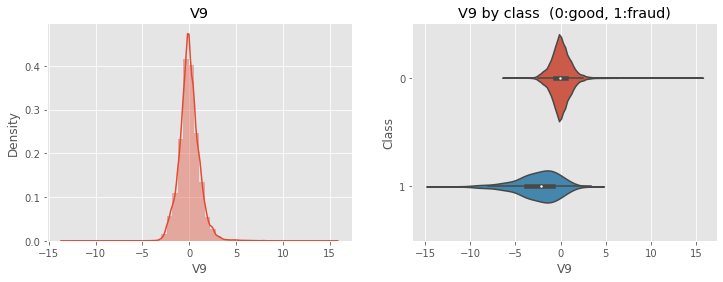

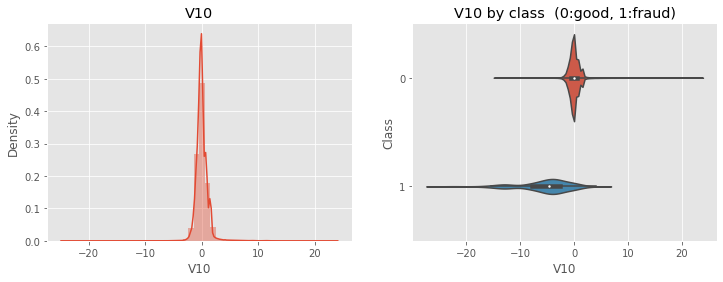

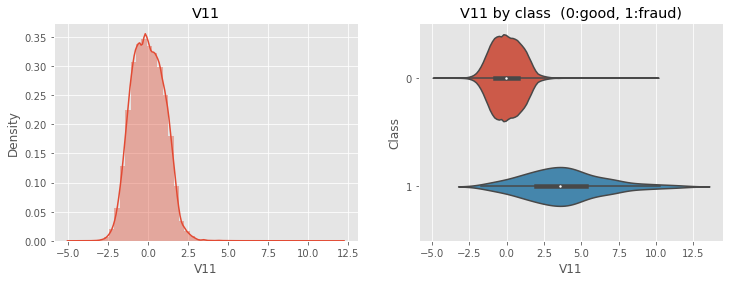

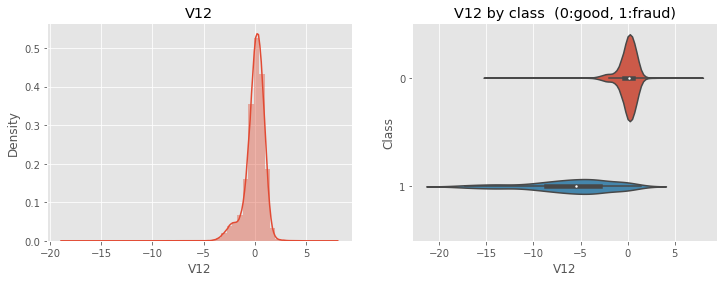

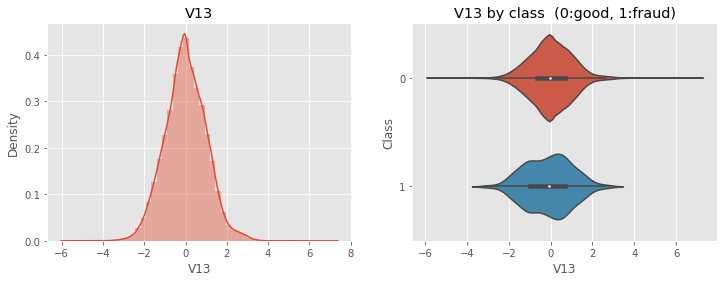

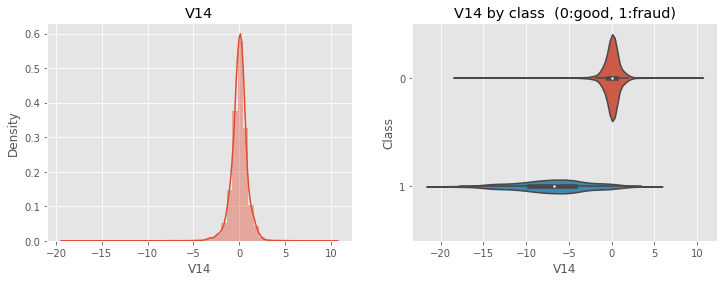

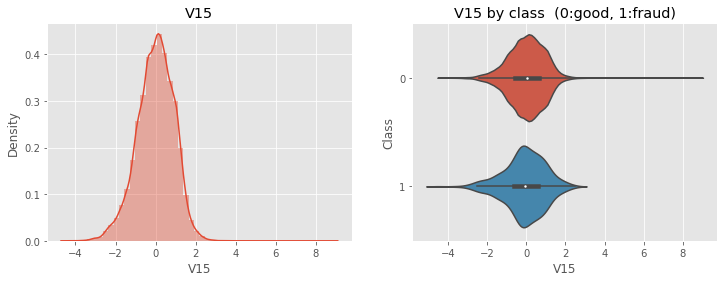

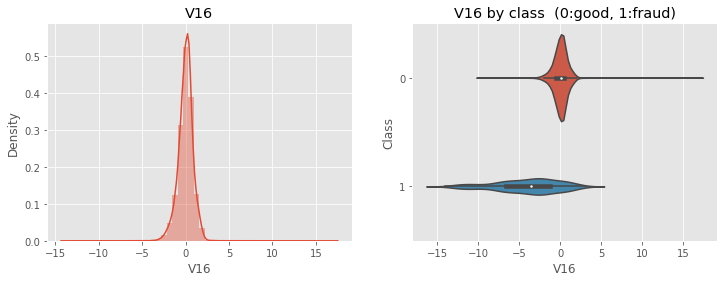

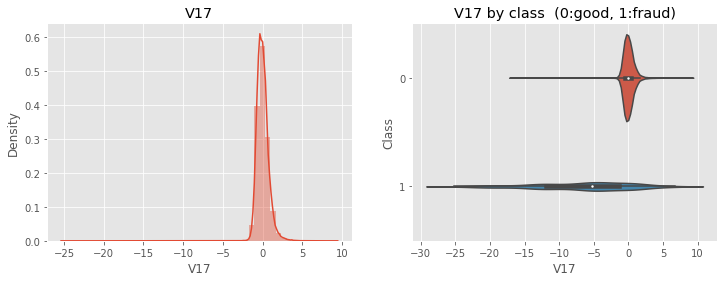

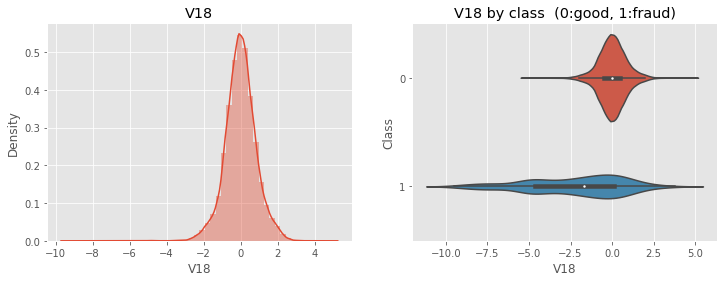

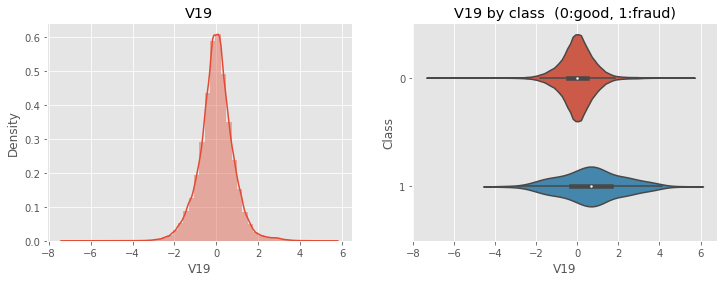

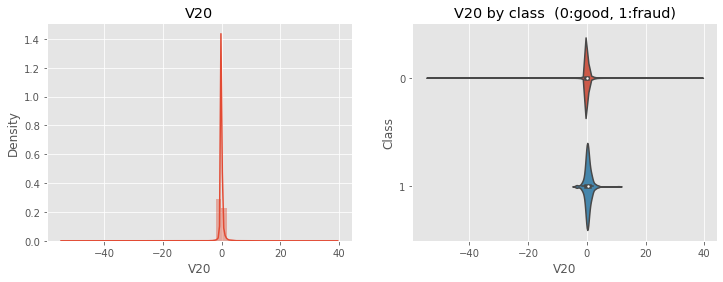

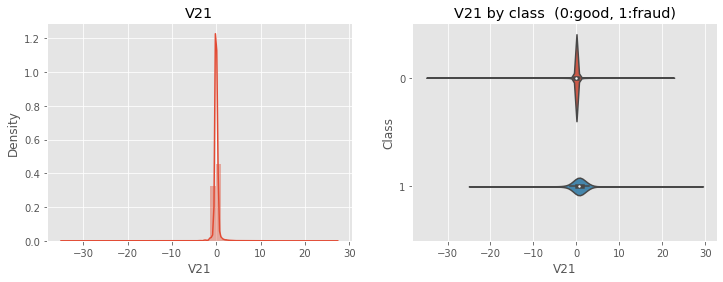

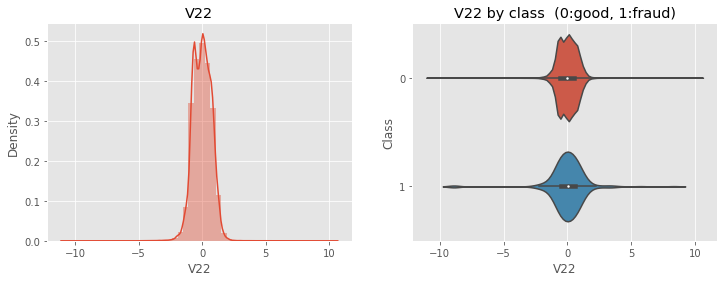

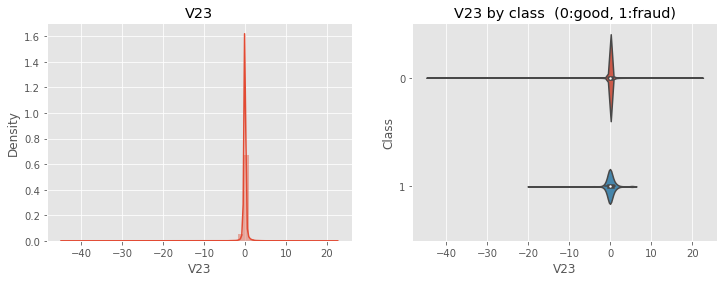

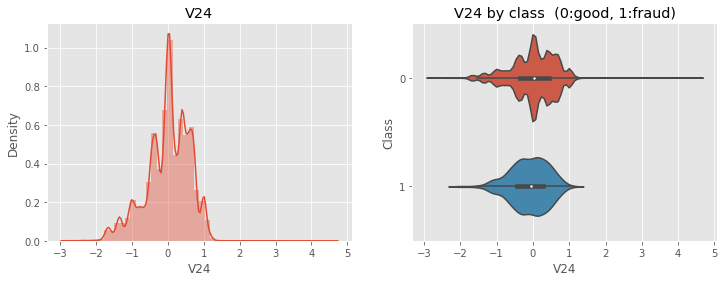

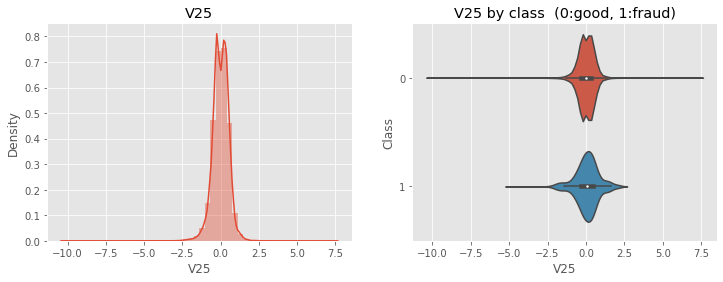

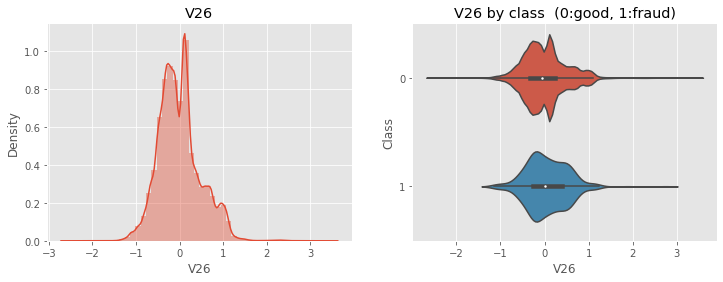

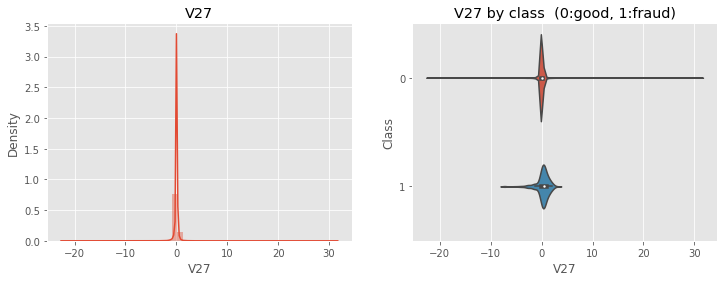

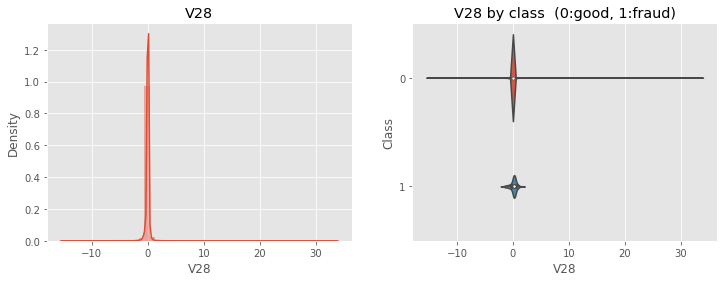

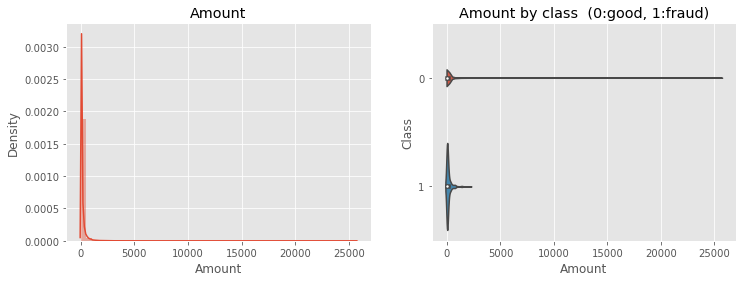

In [338]:
def plot_feature(f):
    _, (ax0,ax1) = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(df[f], ax=ax0)
    ax0.set_title(f)
    sns.violinplot(f,'Class',data=df, orient='h', ax=ax1)
    ax1.set_title(f'{f} by class  (0:good, 1:fraud)')
    plt.show()

for f in df.columns[:-2]:
    plot_feature(f)

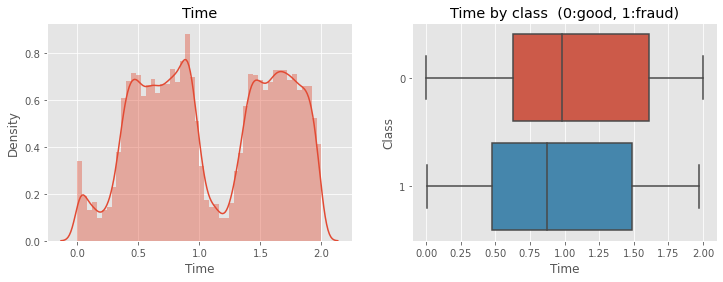

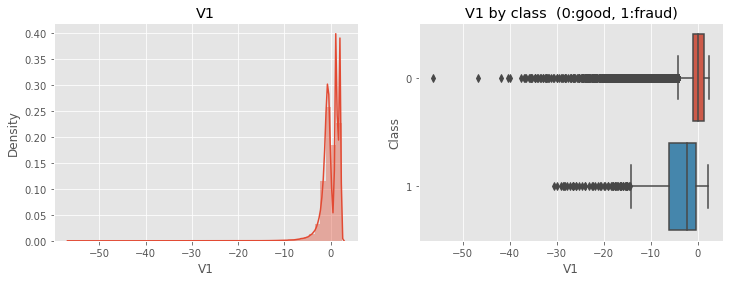

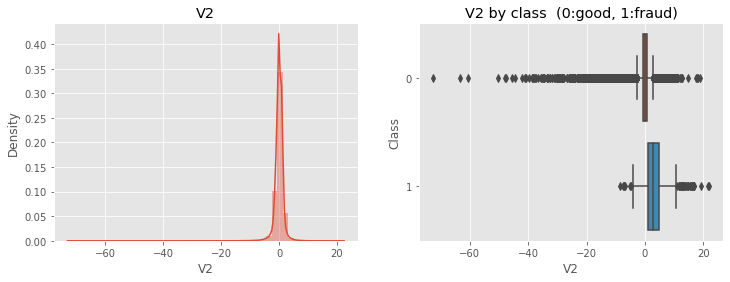

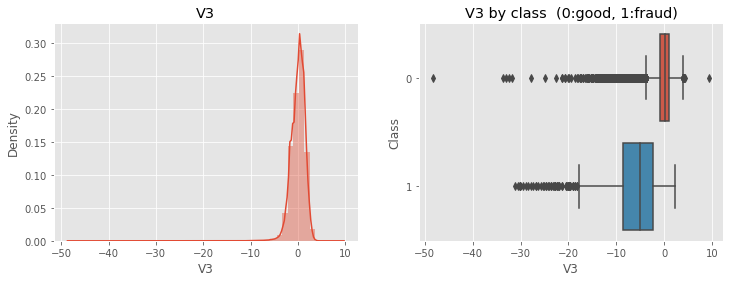

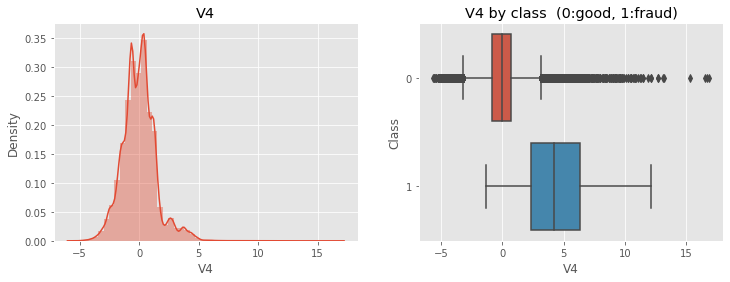

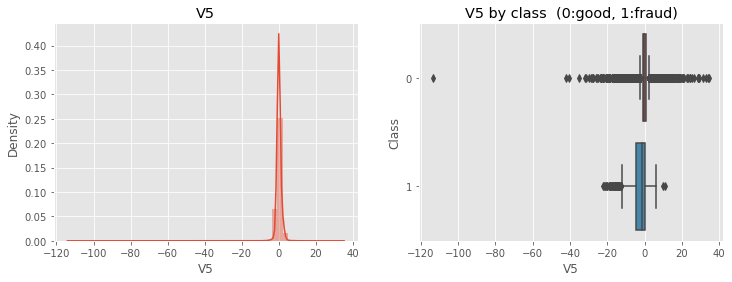

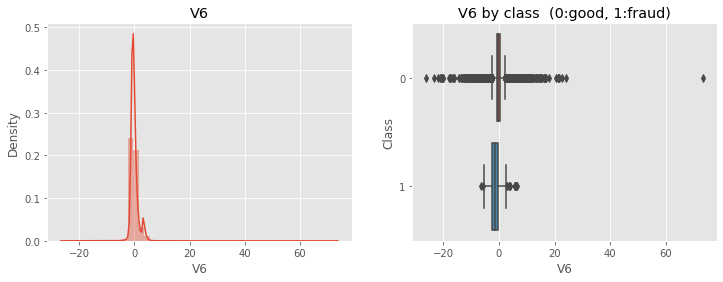

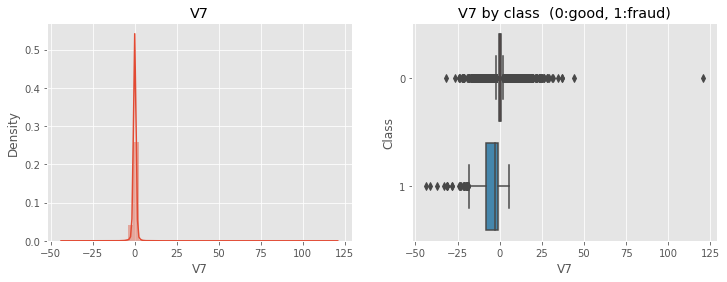

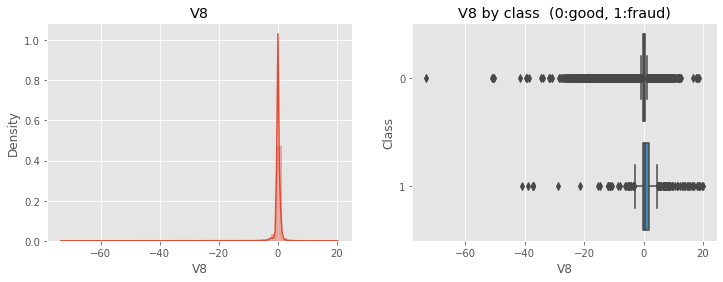

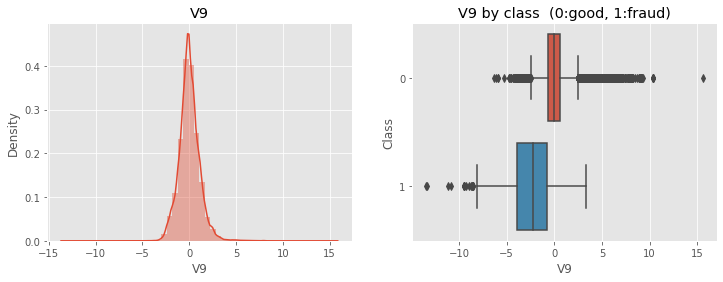

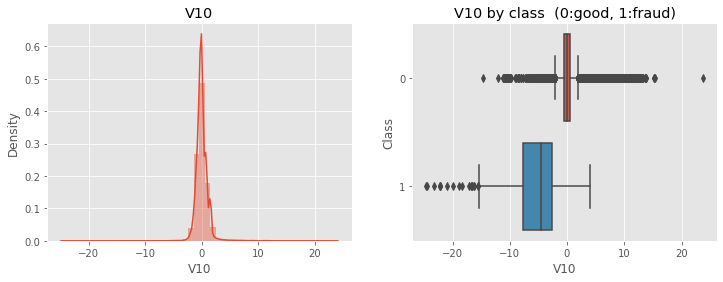

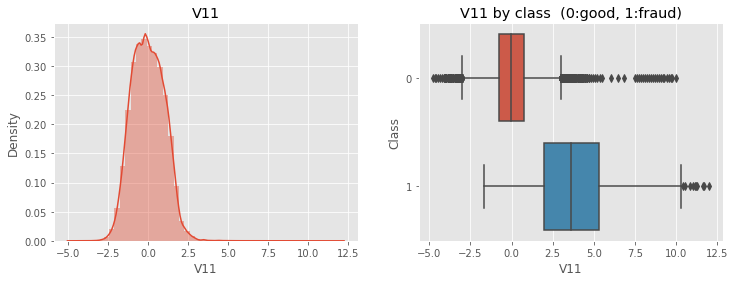

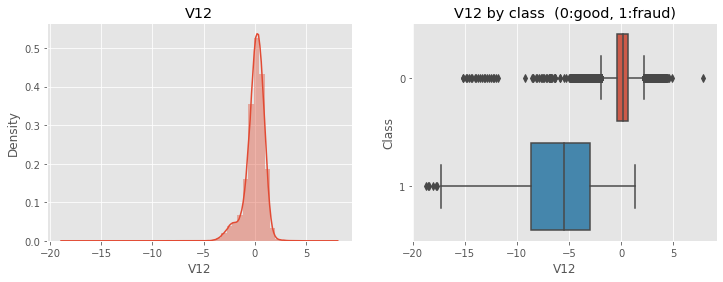

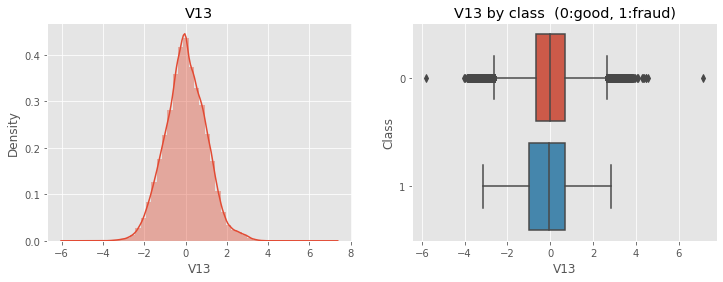

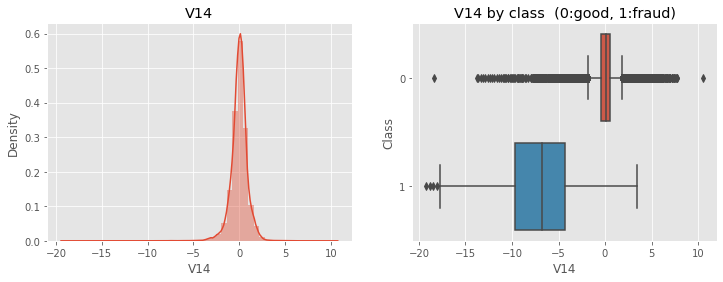

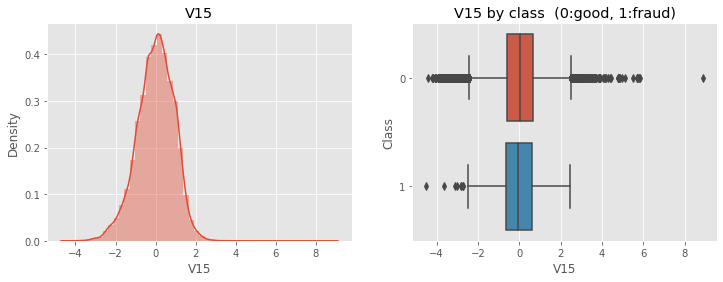

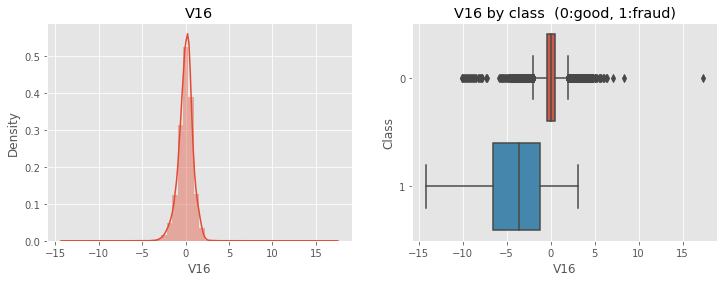

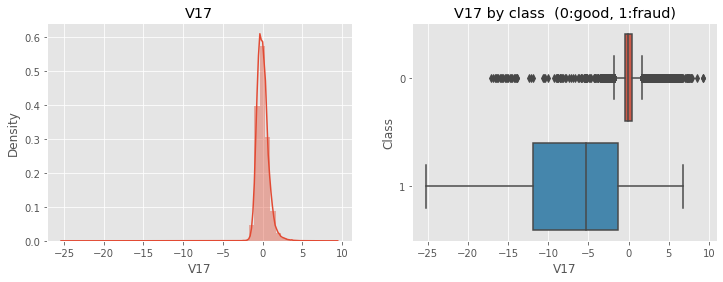

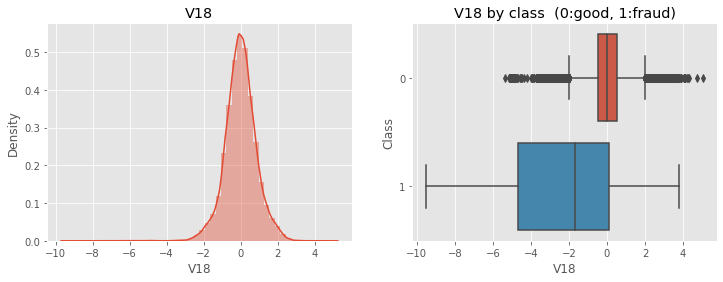

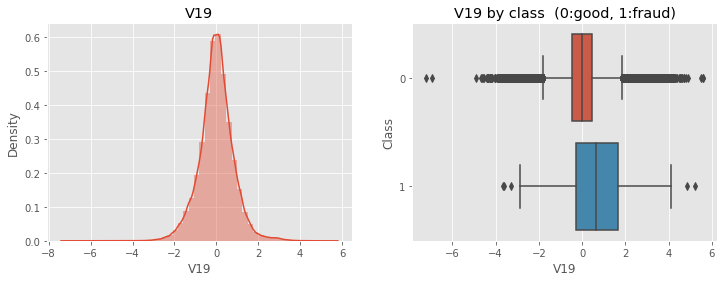

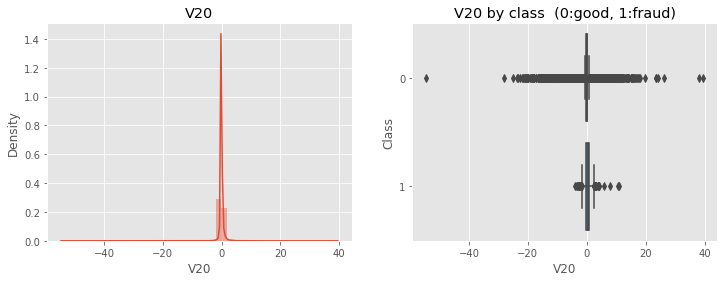

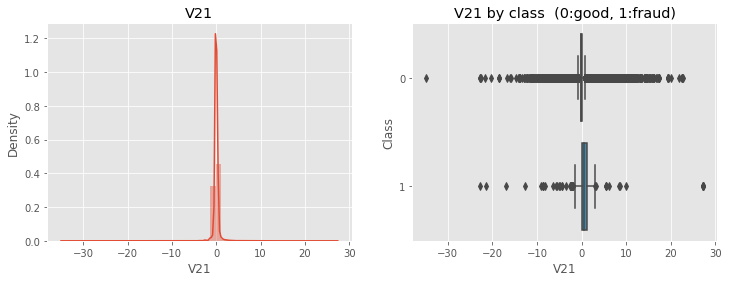

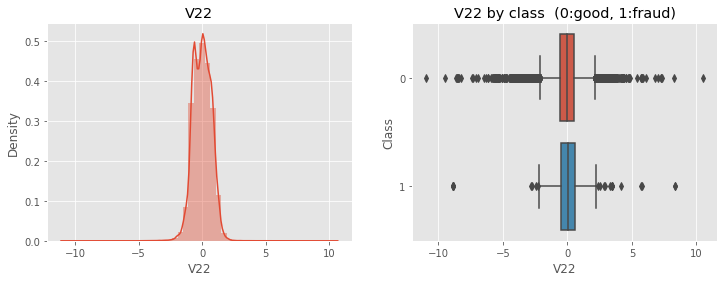

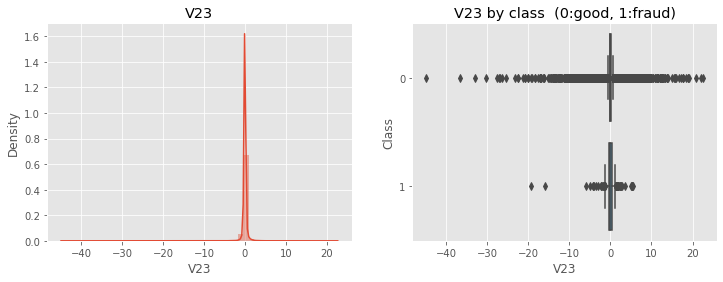

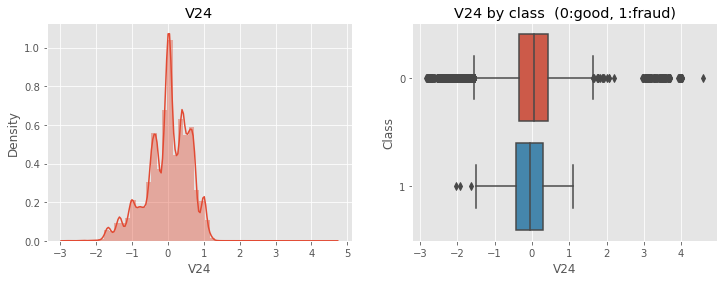

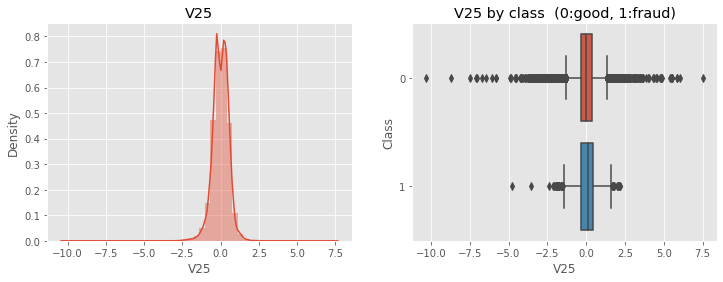

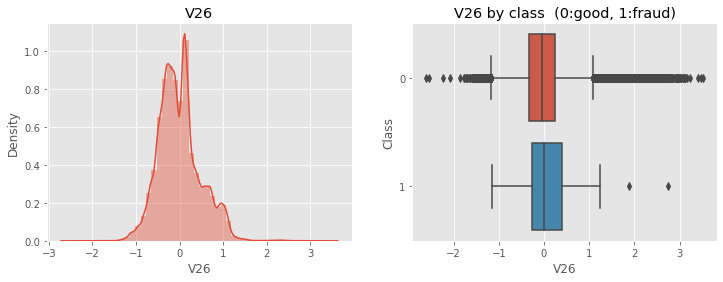

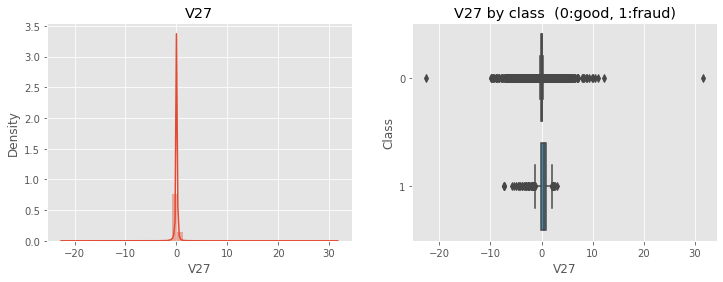

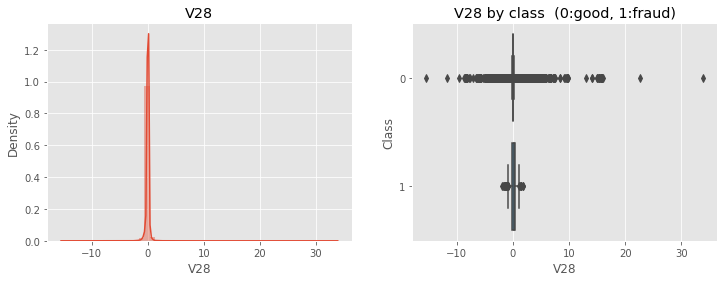

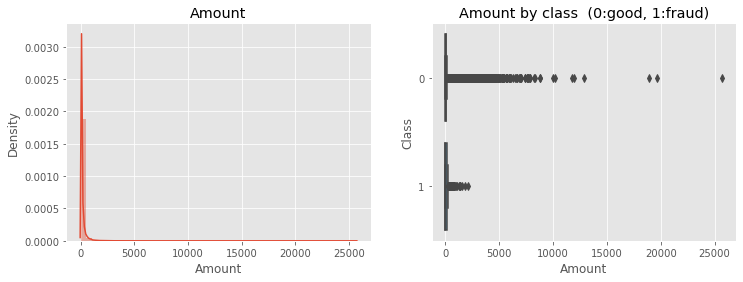

In [339]:
def plot_feature(f):
    _, (ax0,ax1) = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(df[f], ax=ax0)
    ax0.set_title(f)
    sns.boxplot(f,'Class',data=df, orient='h', ax=ax1)
    ax1.set_title(f'{f} by class  (0:good, 1:fraud)')
    plt.show()

for f in df.columns[:-2]:
    plot_feature(f)

# Approach -1 

**From the Correlations Removing Less Important Features and Building the Models with various Pramenterms within the features for getting the best model out of the all the possible models**

### Correlations

Explore correlations, sort features by importance

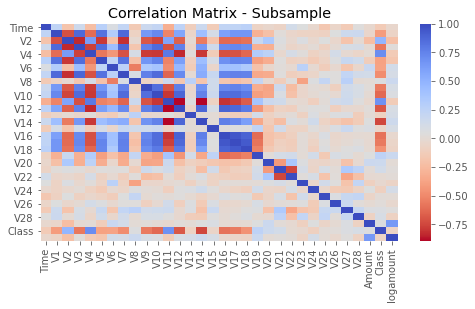

In [340]:
sub_df = pd.concat([df[df.Class==1], df[df.Class==0].sample(sum(df.Class), random_state=SEED)], axis=0)
plt.figure(figsize=(8,4))
sns.heatmap(sub_df.corr(), cmap='coolwarm_r')
plt.title('Correlation Matrix - Subsample')
plt.show()

In [341]:
fi = scipy.stats.ttest_ind(sub_df[sub_df.Class==0], sub_df[sub_df.Class==1], equal_var=False)
fi = pd.DataFrame(data={'corr':sub_df.corr().Class, 'pvalue':fi[1]}).sort_values(by='corr', ascending=False)
fi

corr         pvalue
Class      1.000000   0.000000e+00
V4         0.706196  2.461030e-136
V11        0.688442  1.954372e-122
V2         0.485108   1.413723e-56
V19        0.254957   6.350646e-16
V20        0.167259   1.334520e-07
V21        0.129959   4.646305e-05
V28        0.096494   2.448578e-03
V27        0.071752   2.453931e-02
Amount     0.062673   4.936945e-02
V8         0.059101   6.412742e-02
V26        0.022835   4.743007e-01
V25        0.015498   6.272958e-01
V22       -0.002956   9.262114e-01
V23       -0.020947   5.116665e-01
V15       -0.056027   7.898479e-02
logamount -0.070433   2.716663e-02
V13       -0.082899   9.280862e-03
V24       -0.093027   3.495038e-03
Time      -0.141113   8.865597e-06
V6        -0.373366   8.749251e-34
V5        -0.380567   1.633621e-33
V1        -0.414487   5.790280e-40
V18       -0.458606   8.427406e-49
V7        -0.477290   7.795276e-52
V9        -0.553897   2.507583e-74
V17       -0.559643   1.643530e-71
V3        -0.568731   5.599259e-75
V16       -0.589857   1.510105e-81
V10       -0.626522   1.232362e-92
V12       -0.688923  7.431806e-115
V14       -0.749468  5.932775e-142

There are only a few features (V8, 15, 22, 23, 25, 26) which fall below significance (>5% pvalue) in t-test. However, removing these features proves to be detrimental for the model performance -- indication of non-linear relationship and/or feature interaction effects. 

Conclusion: leave all the features

In [342]:
elim_cols = fi[fi.pvalue>0.05].index.sort_values().tolist()
print(elim_cols)

df.head()

['V15', 'V22', 'V23', 'V25', 'V26', 'V8']


Time        V1        V2        V3        V4        V5        V6  \
0  0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  0.000000  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  0.000012 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  0.000012 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4  0.000023 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V22       V23       V24       V25  \
0  0.239599  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539   
1 -0.078803  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.791461  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.237609  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376   
4  0.592941 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  logamount  
0 -0.189115  0.133558 -0.021053  149.62      0   5.014760  
1  0.125895 -0.008983  0.014724    2.69      0   1.305626  
2 -0.139097 -0.055353 -0.059752  378.66      0   5.939276  
3 -0.221929  0.062723  0.061458  123.50      0   4.824306  
4  0.502292  0.219422  0.215153   69.99      0   4.262539  

[5 rows x 32 columns]

### Train/test Split

In [343]:
TEST_SIZE = 0.2

X_train, X_test = train_test_split(df, test_size=TEST_SIZE, random_state=SEED)

print('train shape: ', X_train.shape)
print(X_train.Class.value_counts())
print(f'{X_train.Class.mean():.6f}  {1/X_train.Class.mean():.1f}')
print(50*'-')
print('test shape: ', X_test.shape)
print(X_test.Class.value_counts())
print(f'{X_test.Class.mean():.6f}  {1/X_test.Class.mean():.1f}')

train shape:  (227845, 32)
0    227446
1       399
Name: Class, dtype: int64
0.001751  571.0
--------------------------------------------------
test shape:  (56962, 32)
0    56869
1       93
Name: Class, dtype: int64
0.001633  612.5


In [344]:
A_test = X_test.pop('Amount') # will be used later to assess the economic effect of filtering
Y_test = X_test.pop('Class')

To address the class imbalance, we downsample the majority class, bringing the ratio of fraud:good from 1:600 to 1:1 or 1:10

In [345]:
G = 10

X_train = pd.concat([X_train[X_train.Class==1],
                    X_train[X_train.Class==0].sample(G*sum(X_train.Class), random_state=SEED)
                    ], axis=0)

print('Subsampled train shape: ', X_train.shape)
print(X_train.Class.value_counts())
print(f'{X_train.Class.mean():.6f}  {1/X_train.Class.mean():.1f}')


Subsampled train shape:  (4389, 32)
0    3990
1     399
Name: Class, dtype: int64
0.090909  11.0


In [346]:
A_train = X_train.pop('Amount') # will be used later to assess the economic effect of filtering
Y_train = X_train.pop('Class')

### t-SNE
2d embedding of the Train set:

In [347]:
def plot_tsne(X_emb, Y):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_emb[np.where(Y==0), 0], X_emb[np.where(Y==0), 1], marker='.', color='g', alpha=1, label='Non Fraud')
    plt.scatter(X_emb[np.where(Y==1), 0], X_emb[np.where(Y==1), 1], marker='o', color='r', alpha=0.5, label='Fraud')
    plt.title('t-SNE embedding')
    plt.legend(loc='best')
    plt.show()

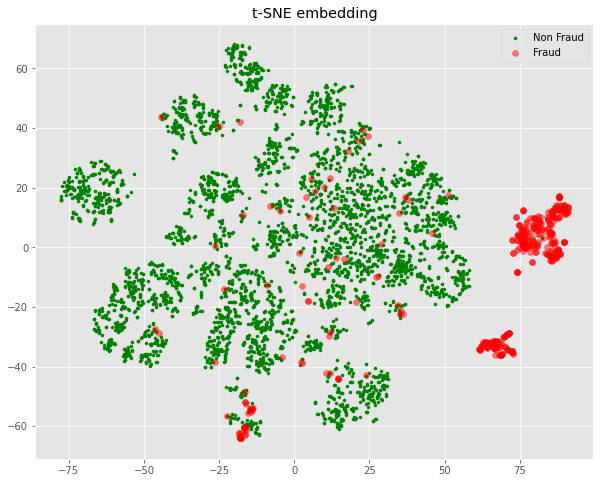

In [348]:
tsne = TSNE(n_components=2, random_state=SEED)

X_emb = tsne.fit_transform(X_train)
plot_tsne(X_emb, Y_train)

The vast majority of fraud is nicely separable, but not all of them!

# Classifiers

### Helpers

Standard evaluation - all models should call this methods

In [349]:
Y_hats_best = []
classifiers_best = []

In [350]:
def model_comparision_report():
    return pd.DataFrame(columns=['classifier_name',
                                'AUC', 'AUPRC'
                                ])

modelcompar = model_comparision_report()
modelcompar

Empty DataFrame
Columns: [classifier_name, AUC, AUPRC]
Index: []

In [351]:
modelcompar = model_comparision_report()
dictionary_row = {"Devices":"Laptop","months":"Mar month"}

df = df.append(dictionary_row, ignore_index=True)

In [352]:
def new_report():
    return pd.DataFrame(columns=['classifier', 
                                'TN', 'FP', 'FN', 'TP',
                                'AUC', 'AUPRC', 
                                'max_gain',   # maximum net gain achieved at the optimal cutoff threshold
                                              # calculated as % of total gain of a perfect filter
                                'precision', 'recall', 'fpr',  # all for the optimal cutoff threshold
                                ])
reports = new_report()
reports

Empty DataFrame
Columns: [classifier, TN, FP, FN, TP, AUC, AUPRC, max_gain, precision, recall, fpr]
Index: []

In [353]:
def threshold_arrays(y_true, y_hat):
    
    fpr, recall, thresholds = roc_curve(y_true, y_hat)
    thresholds[0]=1  #remedy sklearn's artifact of thresholds[0]>1
    precision = 1/(1+(fpr/recall)*(len(y_true)/sum(y_true)-1)) 
    
    stay = np.full_like(thresholds, True, dtype=bool)
    if len(thresholds)>1_000: # downsize all arrays to size <1_000 (to speed up calculations)
        stay[100:-100] = False         
        stay[100:-100:1+len(thresholds)//1000] = True  # in between, leave only nth element s.t. total len<~1_000

    thresholds, precision, recall, fpr = thresholds[stay], precision[stay], recall[stay], fpr[stay]

    return thresholds, precision, recall, fpr


In [354]:
def optimal_points(y_true, 
                   y_hat, 
                   amount,
                   MARGIN=MARGIN,
                   CHARGEBACK=CHARGEBACK,
                   LOST=LOST,
                   EXT=EXT,
                   ):    
   
    thresholds, precision, recall, fpr = threshold_arrays(y_true, y_hat)

    net_gain = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        tp = (y_hat>t)*y_true     ==1  # array of Bool - True Positives
        fp = (y_hat>t)*(1-y_true) ==1  # array of Bool - False Positives
        net_gain[i] = (1-MARGIN)*sum(amount[tp]) + CHARGEBACK*sum(tp) - MARGIN*LOST*sum(amount[fp]) - EXT*sum(fp)

    # optimal (maximum) economic gain as % of the gain of a perfect filter (TP=P, FP=0)
    opt_gain = max(net_gain) / ((1-MARGIN)*sum(amount[y_true==1]) + CHARGEBACK*sum(y_true))

    # optimal point metrics
    idx = np.argmax(net_gain)
    opt_precision = precision[idx]
    opt_recall    = recall[idx]
    opt_fpr       = fpr[idx]
    opt_threshold = thresholds[idx]
    
    return opt_gain, opt_precision, opt_recall, opt_fpr, opt_threshold

In [355]:
def report(classifier_name, y_hat, y_true=Y_test, amount=A_test):
    
    AUC   = roc_auc_score(y_true, y_hat)
    AUPRC = average_precision_score(y_true, y_hat)
    opt_gain, opt_precision, opt_recall, opt_fpr, opt_threshold = optimal_points(y_true, y_hat, amount)
    tn, fp, fn, tp = confusion_matrix(y_true, y_hat>opt_threshold).ravel()

    df = new_report()
    df.loc[0] = ([classifier_name, 
                    tn, fp, fn, tp,
                    f'{AUC:.3f}',
                    f'{AUPRC:.3f}',
                    f'{opt_gain:.3f}',
                    f'{opt_precision:.3f}',
                    f'{opt_recall:.3f}',
                    f'{opt_fpr:.6f}',
                    ])
    return df


In [356]:
def plot_classifiers(title, classifiers, y_hats, y_true=Y_test, amount=A_test):    

    _,(ax0,ax1) = plt.subplots(1, 2, figsize=(16, 6))

    for i, y_hat in enumerate(y_hats):
    
        thresholds, precision, recall, fpr = threshold_arrays(y_true, y_hat)
        opt_gain, opt_precision, opt_recall, opt_fpr, opt_threshold = optimal_points(y_true, y_hat, amount)
        point_label = 'optimal gain' if i==len(classifiers)-1 else ''

        ax0.plot(recall,  precision, label=f'{classifiers[i]}    AUPRC={average_precision_score(y_true, y_hat):.3f}')
        ax0.set_xlabel('recall')
        ax0.set_ylabel('precision')
        ax0.set_title(f'{title}. Precision-Recall')
        ax0.plot((opt_recall), (opt_precision), color='m', marker='o', label=point_label)
        ax0.legend(loc='lower left')

        ax1.plot(fpr, recall, label=f'{classifiers[i]}    AUC={roc_auc_score(y_true, y_hat):.3f}')
        ax1.set_xlabel('false positive rate')
        ax1.set_ylabel('recall')
        ax1.set_title(f'{title}. ROC for FRP<0.1%')
        ax1.plot((opt_fpr), (opt_recall), color='m', marker='o', label=point_label)
        ax1.legend(loc='lower right')
        ax1.set_xlim(0,0.001)

    plt.show()

### Logistic Regression

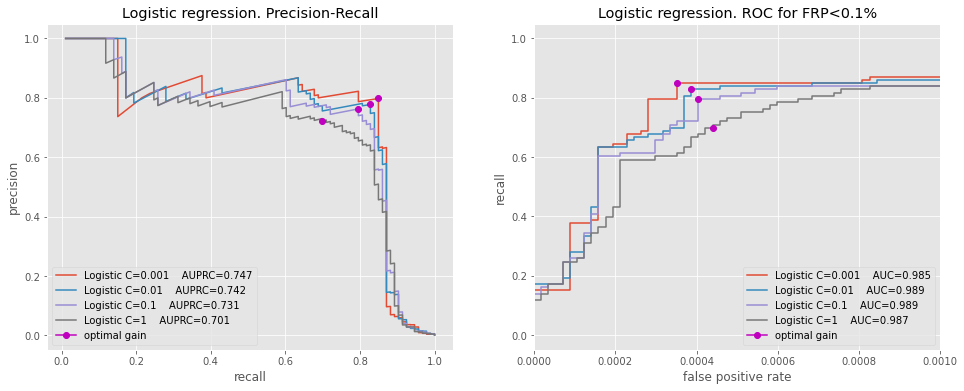

In [357]:
model = linear_model.LogisticRegression(penalty='l2', random_state=SEED)

params = [0.001, 0.01, 0.1, 1]

classifiers, Y_hats = [],[]
for param in params:

    classifiers.append(f'Logistic C={param}')
    model.set_params(C=param)
    model.fit(X_train, Y_train)

    Y_hat = model.predict_proba(X_test)[:,1]
    Y_hats.append(Y_hat)

    reports = pd.concat([reports, report(classifiers[-1], Y_hat)])

plot_classifiers('Logistic regression', classifiers, Y_hats)

In [358]:
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain precision  \
0  Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598     0.798   
0   Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567     0.778   
0    Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538     0.763   
0      Logistic C=1  56845  24  28  65  0.987  0.701    0.441     0.722   

  recall       fpr  
0  0.849  0.000352  
0  0.828  0.000387  
0  0.796  0.000404  
0  0.699  0.000440

In [359]:
row1 = {'classifier_name':"Logistic C=0.001",'AUC':0.985, 'AUPRC':0.747}
row2 = {'classifier_name':"Logistic C=0.01",'AUC':0.989, 'AUPRC':0.742}
row3 = {'classifier_name':"Logistic C=0.1",'AUC':0.989, 'AUPRC':0.731}
row4 = {'classifier_name':"Logistic C=1",'AUC':0.987, 'AUPRC':0.701}
modelcompar = model_comparision_report()

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar = modelcompar.append(row2, ignore_index=True)
modelcompar = modelcompar.append(row3, ignore_index=True)
modelcompar = modelcompar.append(row4, ignore_index=True)

In [360]:
modelcompar

classifier_name    AUC  AUPRC
0  Logistic C=0.001  0.985  0.747
1   Logistic C=0.01  0.989  0.742
2    Logistic C=0.1  0.989  0.731
3      Logistic C=1  0.987  0.701

In [361]:
best_id = np.argmax(reports.max_gain[-len(classifiers):])

Y_hats_best.append(Y_hats[best_id])
classifiers_best.append(classifiers[best_id])

Conclusions from the Logistic Primer:
- Train set negatives:positives of G=1:1 is inferior to G=10:1
- Do not eliminate weakly correlated features
- Regularize! 
- AUPRC is better aligned with the business objective than AUC


### SVM

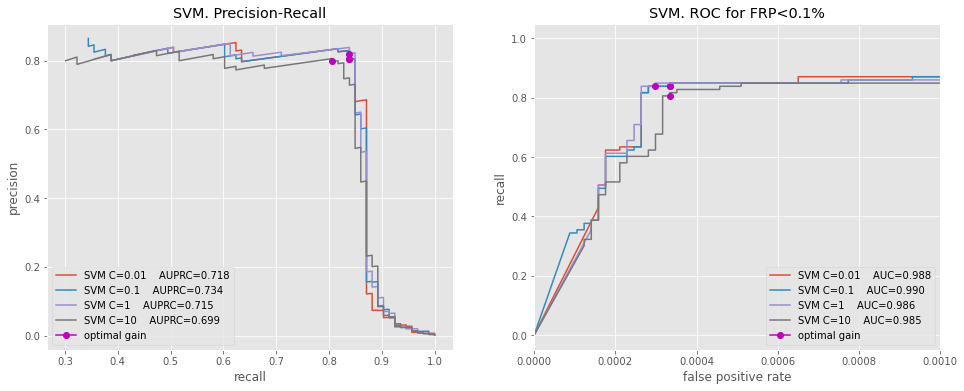

In [362]:
model = svm.SVC(kernel='poly', C=1, degree=1, probability=True, random_state=SEED)

params = [0.01, 0.1, 1, 10]

classifiers, Y_hats = [],[]
for param in params:

    classifiers.append(f'SVM C={param}')
    model.set_params(C=param)
    model.fit(X_train, Y_train)

    Y_hat = model.predict_proba(X_test)[:,1]
    Y_hats.append(Y_hat)

    reports = pd.concat([reports, report(classifiers[-1], Y_hat)])

plot_classifiers('SVM', classifiers, Y_hats)

In [363]:
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain precision  \
0  Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598     0.798   
0   Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567     0.778   
0    Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538     0.763   
0      Logistic C=1  56845  24  28  65  0.987  0.701    0.441     0.722   
0        SVM C=0.01  56851  18  15  78  0.988  0.718    0.612     0.804   
0         SVM C=0.1  56851  18  15  78  0.990  0.734    0.612     0.804   
0           SVM C=1  56853  16  15  78  0.986  0.715    0.613     0.821   
0          SVM C=10  56851  18  18  75  0.985  0.699    0.567     0.798   

  recall       fpr  
0  0.849  0.000352  
0  0.828  0.000387  
0  0.796  0.000404  
0  0.699  0.000440  
0  0.839  0.000334  
0  0.839  0.000334  
0  0.839  0.000299  
0  0.806  0.000334

In [364]:
row1 = {'classifier_name':"SVM C=0.01",'AUC':0.988, 'AUPRC':0.718}
row2 = {'classifier_name':"SVM C=0.1",'AUC':0.990, 'AUPRC':0.734}
row3 = {'classifier_name':"SVM C=1",'AUC':0.986, 'AUPRC':0.715}
row4 = {'classifier_name':"SVM C=10",'AUC':0.985, 'AUPRC':0.699}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar = modelcompar.append(row2, ignore_index=True)
modelcompar = modelcompar.append(row3, ignore_index=True)
modelcompar = modelcompar.append(row4, ignore_index=True)

In [365]:
modelcompar

classifier_name    AUC  AUPRC
0  Logistic C=0.001  0.985  0.747
1   Logistic C=0.01  0.989  0.742
2    Logistic C=0.1  0.989  0.731
3      Logistic C=1  0.987  0.701
4        SVM C=0.01  0.988  0.718
5         SVM C=0.1  0.990  0.734
6           SVM C=1  0.986  0.715
7          SVM C=10  0.985  0.699

In [366]:
best_id = np.argmax(reports.max_gain[-len(classifiers):])

Y_hats_best.append(Y_hats[best_id])
classifiers_best.append(classifiers[best_id])

### XGBoost

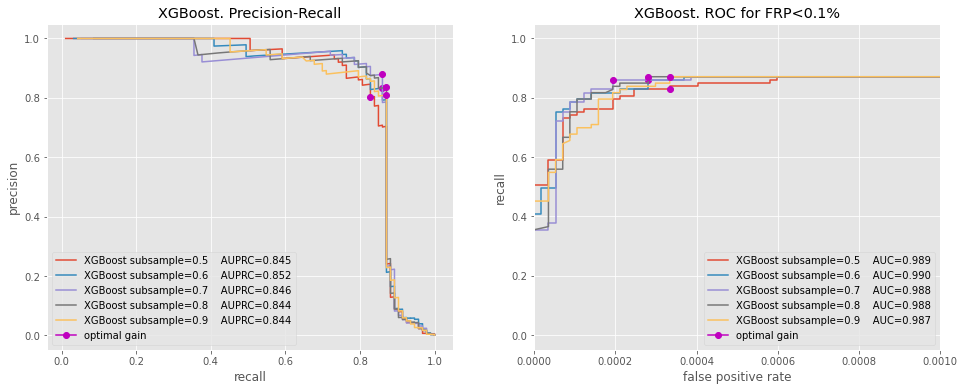

In [367]:
model= XGBClassifier(   max_depth=3, 
                        learning_rate=0.2,
                        n_estimators=2_000,
                        objective='binary:logistic',
                        subsample=0.75,
                        colsample_bylevel=0.75,
                        colsample_bytree=0.75,
                        gamma=0, 
                        min_child_weight=0, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        base_score=0.8, 
                        random_state=SEED, 
                     )
params = [0.5, 0.6, 0.7, 0.8, 0.9]

classifiers, Y_hats = [],[]
for param in params:

    classifiers.append(f'XGBoost subsample={param}')
    model.set_params(subsample=param, colsample_bylevel=param, colsample_bytree=param)
    model.fit(X_train, Y_train)

    Y_hat = model.predict_proba(X_test)[:,1]
    Y_hats.append(Y_hat)

    reports = pd.concat([reports, report(classifiers[-1], Y_hat)])

plot_classifiers('XGBoost', classifiers, Y_hats)

In [368]:
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain precision  \
0       Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598     0.798   
0        Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567     0.778   
0         Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538     0.763   
0           Logistic C=1  56845  24  28  65  0.987  0.701    0.441     0.722   
0             SVM C=0.01  56851  18  15  78  0.988  0.718    0.612     0.804   
0              SVM C=0.1  56851  18  15  78  0.990  0.734    0.612     0.804   
0                SVM C=1  56853  16  15  78  0.986  0.715    0.613     0.821   
0               SVM C=10  56851  18  18  75  0.985  0.699    0.567     0.798   
0  XGBoost subsample=0.5  56851  18  16  77  0.989  0.845    0.613     0.802   
0  XGBoost subsample=0.6  56853  16  14  79  0.990  0.852    0.619     0.833   
0  XGBoost subsample=0.7  56858  11  14  79  0.988  0.846    0.602     0.879   
0  XGBoost subsample=0.8  56853  16  13  80  0.988  0.844    0.619     0.835   
0  XGBoost subsample=0.9  56850  19  13  80  0.987  0.844    0.619     0.810   

  recall       fpr  
0  0.849  0.000352  
0  0.828  0.000387  
0  0.796  0.000404  
0  0.699  0.000440  
0  0.839  0.000334  
0  0.839  0.000334  
0  0.839  0.000299  
0  0.806  0.000334  
0  0.828  0.000334  
0  0.860  0.000281  
0  0.860  0.000193  
0  0.871  0.000281  
0  0.871  0.000334

In [369]:
row1 = {'classifier_name':"XGBoost subsample=0.5",'AUC':0.989, 'AUPRC':0.845}
row2 = {'classifier_name':"XGBoost subsample=0.6",'AUC':0.990, 'AUPRC':0.852}
row3 = {'classifier_name':"XGBoost subsample=0.7",'AUC':0.988, 'AUPRC':0.846}
row4 = {'classifier_name':"XGBoost subsample=0.8",'AUC':0.988, 'AUPRC':0.844}
row5 = {'classifier_name':"XGBoost subsample=0.9",'AUC':0.987, 'AUPRC':0.844}
modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar = modelcompar.append(row2, ignore_index=True)
modelcompar = modelcompar.append(row3, ignore_index=True)
modelcompar = modelcompar.append(row4, ignore_index=True)
modelcompar = modelcompar.append(row5, ignore_index=True)

In [370]:
modelcompar

classifier_name    AUC  AUPRC
0        Logistic C=0.001  0.985  0.747
1         Logistic C=0.01  0.989  0.742
2          Logistic C=0.1  0.989  0.731
3            Logistic C=1  0.987  0.701
4              SVM C=0.01  0.988  0.718
5               SVM C=0.1  0.990  0.734
6                 SVM C=1  0.986  0.715
7                SVM C=10  0.985  0.699
8   XGBoost subsample=0.5  0.989  0.845
9   XGBoost subsample=0.6  0.990  0.852
10  XGBoost subsample=0.7  0.988  0.846
11  XGBoost subsample=0.8  0.988  0.844
12  XGBoost subsample=0.9  0.987  0.844

In [371]:
# the best classifier is the one producing maximum economic gain
best_id = np.argmax(reports.max_gain[-len(classifiers):])
Y_hats_best.append(Y_hats[best_id])
classifiers_best.append(classifiers[best_id])

XGBoost feature importance

In [372]:
param = float(classifiers_best[-1].split('=')[1])
model.set_params(subsample=param, colsample_bylevel=param, colsample_bytree=param)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.8, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2020, ...)

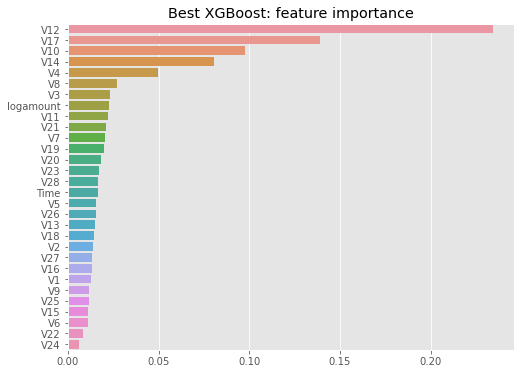

In [373]:
fi = pd.Series(model.feature_importances_, index=X_train.columns) #X_train.columns)
fi = fi.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot( fi.values, fi.index, orient='h')
plt.title('Best XGBoost: feature importance')
plt.show()

### Neural Network

In [374]:
EPOCHS     = 50
BATCH_SIZE = 256     # large batch size to include ~1/G positive samples

neg, pos = np.bincount(Y_train)
output_bias = np.log(pos/neg)

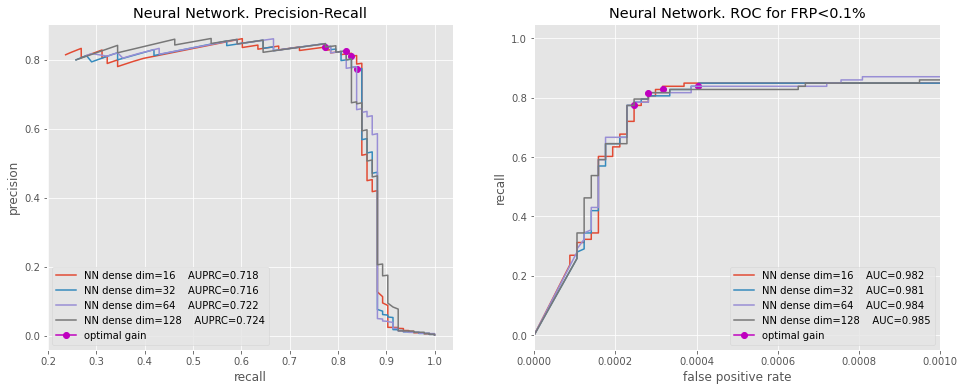

In [375]:
params = [16, 32, 64, 128]

classifiers, Y_hats = [],[]
for param in params:

    classifiers.append(f'NN dense dim={param}')
    
    input = Input(shape=(X_train.shape[-1],), dtype=tf.int32)
    x = Dense(param, activation='relu')(input)
    x = Dropout(0.2, seed=SEED)(x)
    output = Dense(1, activation='sigmoid', bias_initializer=Constant(output_bias))(x)
    model = Model(input, output)

    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=[AUC(name='AUC'), AUC(curve='PR', name='AUPRC')])
    model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0)

    Y_hat = np.squeeze(model(X_test.values).numpy()) 
    Y_hats.append(Y_hat)

    reports = pd.concat([reports, report(classifiers[-1], Y_hat)])

plot_classifiers('Neural Network', classifiers, Y_hats)

In [376]:
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain precision  \
0       Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598     0.798   
0        Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567     0.778   
0         Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538     0.763   
0           Logistic C=1  56845  24  28  65  0.987  0.701    0.441     0.722   
0             SVM C=0.01  56851  18  15  78  0.988  0.718    0.612     0.804   
0              SVM C=0.1  56851  18  15  78  0.990  0.734    0.612     0.804   
0                SVM C=1  56853  16  15  78  0.986  0.715    0.613     0.821   
0               SVM C=10  56851  18  18  75  0.985  0.699    0.567     0.798   
0  XGBoost subsample=0.5  56851  18  16  77  0.989  0.845    0.613     0.802   
0  XGBoost subsample=0.6  56853  16  14  79  0.990  0.852    0.619     0.833   
0  XGBoost subsample=0.7  56858  11  14  79  0.988  0.846    0.602     0.879   
0  XGBoost subsample=0.8  56853  16  13  80  0.988  0.844    0.619     0.835   
0  XGBoost subsample=0.9  56850  19  13  80  0.987  0.844    0.619     0.810   
0        NN dense dim=16  56852  17  16  77  0.982  0.718    0.612     0.811   
0        NN dense dim=32  56847  22  15  78  0.981  0.716    0.592     0.772   
0        NN dense dim=64  56856  13  21  72  0.984  0.722    0.564     0.837   
0       NN dense dim=128  56853  16  18  75  0.985  0.724    0.587     0.826   

  recall       fpr  
0  0.849  0.000352  
0  0.828  0.000387  
0  0.796  0.000404  
0  0.699  0.000440  
0  0.839  0.000334  
0  0.839  0.000334  
0  0.839  0.000299  
0  0.806  0.000334  
0  0.828  0.000334  
0  0.860  0.000281  
0  0.860  0.000193  
0  0.871  0.000281  
0  0.871  0.000334  
0  0.828  0.000317  
0  0.839  0.000404  
0  0.774  0.000246  
0  0.817  0.000281

In [377]:
row1 = {'classifier_name':"NN dense dim=16",'AUC':0.982, 'AUPRC':0.718}
row2 = {'classifier_name':"NN dense dim=32",'AUC':0.981, 'AUPRC':0.716}
row3 = {'classifier_name':"NN dense dim=64",'AUC':0.984, 'AUPRC':0.722}
row4 = {'classifier_name':"NN dense dim=128",'AUC':0.985, 'AUPRC':0.724}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar = modelcompar.append(row2, ignore_index=True)
modelcompar = modelcompar.append(row3, ignore_index=True)
modelcompar = modelcompar.append(row4, ignore_index=True)

In [378]:
modelcompar

classifier_name    AUC  AUPRC
0        Logistic C=0.001  0.985  0.747
1         Logistic C=0.01  0.989  0.742
2          Logistic C=0.1  0.989  0.731
3            Logistic C=1  0.987  0.701
4              SVM C=0.01  0.988  0.718
5               SVM C=0.1  0.990  0.734
6                 SVM C=1  0.986  0.715
7                SVM C=10  0.985  0.699
8   XGBoost subsample=0.5  0.989  0.845
9   XGBoost subsample=0.6  0.990  0.852
10  XGBoost subsample=0.7  0.988  0.846
11  XGBoost subsample=0.8  0.988  0.844
12  XGBoost subsample=0.9  0.987  0.844
13        NN dense dim=16  0.982  0.718
14        NN dense dim=32  0.981  0.716
15        NN dense dim=64  0.984  0.722
16       NN dense dim=128  0.985  0.724

In [379]:
# the best classifier is the one producing maximum economic gain
best_id = np.argmax(reports.max_gain[-len(classifiers):])

Y_hats_best.append(Y_hats[best_id])
classifiers_best.append(classifiers[best_id])

### Autoencoders

Extract features through an autoencoder network, apply best classifier to extracted features.

In [380]:
dim = 32

input = Input(shape=(X_train.shape[-1],), dtype=tf.int32)
x = Dense(dim, activation='tanh')(input)
x = Dense(4, activation='tanh')(x) 
output = Dense(dim, activation='tanh')(x)
autoencoder = Model(input, output)
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=100, verbose=0)
extractor = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

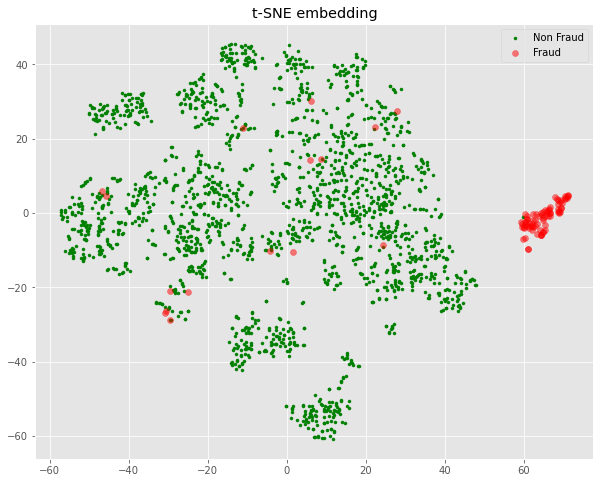

In [381]:
X_test_sub = X_test.copy()
X_test_sub['Class'] = Y_test
X_test_sub = pd.concat([X_test_sub[X_test_sub.Class==1], X_test_sub[X_test_sub.Class==0].sample(2_000, random_state=SEED)])
Y_test_sub = X_test_sub.pop('Class')

plot_tsne(tsne.fit_transform(X_test_sub), Y_test_sub)

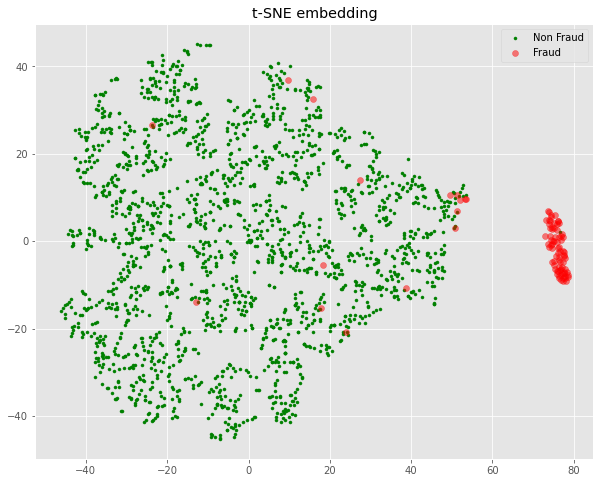

In [382]:
X_encoded = np.squeeze(extractor(X_test_sub.values).numpy()) 

plot_tsne(tsne.fit_transform(X_encoded), Y_test_sub)

The two classes become more separable visually in a t-SNE embedding BUT the same amount of False Negatives (~15 red dots) still remain part of the green cloud. Performance of XGBoost did NOT improve when trained on the autoencoded features:

In [383]:
X_train_e = extractor(X_train.values)
X_train_e.shape

TensorShape([4389, 4])

In [384]:
X_test_e = np.squeeze(extractor(X_test.values).numpy()) 
X_test_e.shape

(56962, 4)

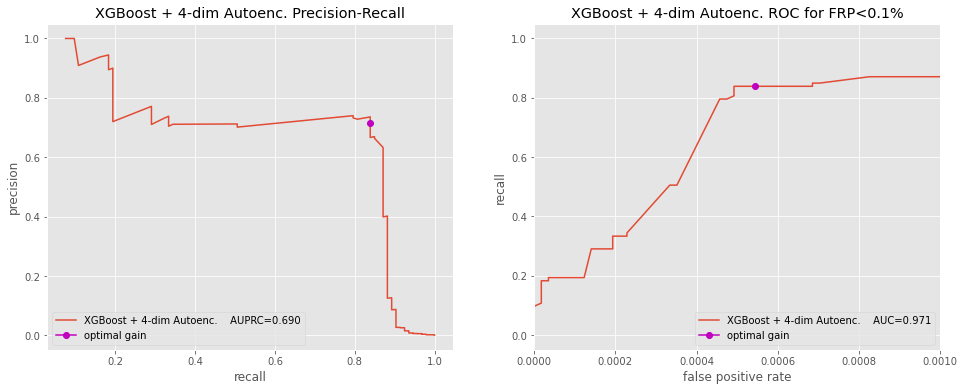

In [385]:
model= XGBClassifier(   max_depth=3, 
                        learning_rate=0.2,
                        n_estimators=2_000,
                        objective='binary:logistic',
                        subsample=0.75,
                        colsample_bylevel=0.75,
                        colsample_bytree=0.75,
                        gamma=0, 
                        min_child_weight=0, 
                        reg_alpha=0, 
                        reg_lambda=1, 
                        base_score=0.8, 
                        random_state=SEED, 
                     )

model.fit(X_train_e, Y_train)
Y_hat = model.predict_proba(X_test_e)[:,1]
reports = pd.concat([reports, report(f'XGBoost + 4-dim Autoenc', Y_hat)])

classifiers = ['XGBoost + 4-dim Autoenc.']
plot_classifiers('XGBoost + 4-dim Autoenc', classifiers, [Y_hat])

In [386]:
reports.index = range(len(reports))
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain  \
0          Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598   
1           Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567   
2            Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538   
3              Logistic C=1  56845  24  28  65  0.987  0.701    0.441   
4                SVM C=0.01  56851  18  15  78  0.988  0.718    0.612   
5                 SVM C=0.1  56851  18  15  78  0.990  0.734    0.612   
6                   SVM C=1  56853  16  15  78  0.986  0.715    0.613   
7                  SVM C=10  56851  18  18  75  0.985  0.699    0.567   
8     XGBoost subsample=0.5  56851  18  16  77  0.989  0.845    0.613   
9     XGBoost subsample=0.6  56853  16  14  79  0.990  0.852    0.619   
10    XGBoost subsample=0.7  56858  11  14  79  0.988  0.846    0.602   
11    XGBoost subsample=0.8  56853  16  13  80  0.988  0.844    0.619   
12    XGBoost subsample=0.9  56850  19  13  80  0.987  0.844    0.619   
13          NN dense dim=16  56852  17  16  77  0.982  0.718    0.612   
14          NN dense dim=32  56847  22  15  78  0.981  0.716    0.592   
15          NN dense dim=64  56856  13  21  72  0.984  0.722    0.564   
16         NN dense dim=128  56853  16  18  75  0.985  0.724    0.587   
17  XGBoost + 4-dim Autoenc  56839  30  15  78  0.971  0.690    0.580   

   precision recall       fpr  
0      0.798  0.849  0.000352  
1      0.778  0.828  0.000387  
2      0.763  0.796  0.000404  
3      0.722  0.699  0.000440  
4      0.804  0.839  0.000334  
5      0.804  0.839  0.000334  
6      0.821  0.839  0.000299  
7      0.798  0.806  0.000334  
8      0.802  0.828  0.000334  
9      0.833  0.860  0.000281  
10     0.879  0.860  0.000193  
11     0.835  0.871  0.000281  
12     0.810  0.871  0.000334  
13     0.811  0.828  0.000317  
14     0.772  0.839  0.000404  
15     0.837  0.774  0.000246  
16     0.826  0.817  0.000281  
17     0.716  0.839  0.000545

In [387]:
row1 = {'classifier_name':"XGBoost + 4-dim Autoenc",'AUC':0.971, 'AUPRC':0.690}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC  AUPRC
0          Logistic C=0.001  0.985  0.747
1           Logistic C=0.01  0.989  0.742
2            Logistic C=0.1  0.989  0.731
3              Logistic C=1  0.987  0.701
4                SVM C=0.01  0.988  0.718
5                 SVM C=0.1  0.990  0.734
6                   SVM C=1  0.986  0.715
7                  SVM C=10  0.985  0.699
8     XGBoost subsample=0.5  0.989  0.845
9     XGBoost subsample=0.6  0.990  0.852
10    XGBoost subsample=0.7  0.988  0.846
11    XGBoost subsample=0.8  0.988  0.844
12    XGBoost subsample=0.9  0.987  0.844
13          NN dense dim=16  0.982  0.718
14          NN dense dim=32  0.981  0.716
15          NN dense dim=64  0.984  0.722
16         NN dense dim=128  0.985  0.724
17  XGBoost + 4-dim Autoenc  0.971  0.690

In [388]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):
        train_X, train_y, test_X, test_y = X[train_ndx].to_numpy(), y[train_ndx].to_numpy(), X[test_ndx].to_numpy(), y[test_ndx].to_numpy()
        actual_classes = np.append(actual_classes, test_y)
        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)
    return actual_classes, predicted_classes, predicted_proba 

In [389]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [390]:
# Stacking

import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [391]:
def get_dataset():
    return X_train,Y_train

In [392]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression(max_iter=1000)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [393]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [394]:
def evaluate_model(model, X, y):
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
    scores = cross_validate(model,X,y, scoring=scoring,cv=5, return_train_score=True)

    return scores

In [395]:
X, y = get_dataset()
print(X)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    names.append(name)
    results.append(mean(scores['test_acc']))
    print('>%s' % name)
    print(scores.keys())
    print("Accuracy :",mean(scores['test_acc']))
    print("Precison :",mean(scores['test_prec_macro']))
    print("Recall :",mean(scores['test_rec_micro']))  

            Time        V1        V2        V3        V4        V5        V6  \
74496   0.643681 -7.347955  2.397041 -7.572356  5.177819 -2.854838 -1.795239   
251881  1.800255  1.868226  1.363077 -1.994934  4.173516  1.239751 -0.746186   
56703   0.550289  1.176716  0.557091 -0.490800  0.756424  0.249192 -0.781871   
263274  1.861921 -0.644278  5.002352 -8.252739  7.756915 -0.216267 -2.751496   
77387   0.660035 -2.335655  2.225380 -3.379450  2.178538 -3.568264  0.316814   
...          ...       ...       ...       ...       ...       ...       ...   
164512  1.351539  1.929767 -0.168856 -0.036059  1.430825 -0.848680 -0.739643   
52834   0.528588  1.145475  0.104939  0.102362  0.504609 -0.346255 -1.059245   
91468   0.734769  1.258002 -1.438662  0.757870 -1.209729 -1.943558 -0.694436   
260650  1.847836  1.900339 -0.519048  0.170908  0.383634 -1.009477 -0.153089   
180693  1.442813  2.066051  0.036608 -1.964909  0.150379  0.763664 -0.118960   

              V7        V8        V9  .

In [396]:
model.fit(X_train, Y_train)
Y_hat = model.predict_proba(X_test)[:,1]
reports = pd.concat([reports, report(f'Stacking', Y_hat)])

In [397]:
reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain  \
0          Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598   
1           Logistic C=0.01  56847  22  17  76  0.989  0.742    0.567   
2            Logistic C=0.1  56846  23  20  73  0.989  0.731    0.538   
3              Logistic C=1  56845  24  28  65  0.987  0.701    0.441   
4                SVM C=0.01  56851  18  15  78  0.988  0.718    0.612   
5                 SVM C=0.1  56851  18  15  78  0.990  0.734    0.612   
6                   SVM C=1  56853  16  15  78  0.986  0.715    0.613   
7                  SVM C=10  56851  18  18  75  0.985  0.699    0.567   
8     XGBoost subsample=0.5  56851  18  16  77  0.989  0.845    0.613   
9     XGBoost subsample=0.6  56853  16  14  79  0.990  0.852    0.619   
10    XGBoost subsample=0.7  56858  11  14  79  0.988  0.846    0.602   
11    XGBoost subsample=0.8  56853  16  13  80  0.988  0.844    0.619   
12    XGBoost subsample=0.9  56850  19  13  80  0.987  0.844    0.619   
13          NN dense dim=16  56852  17  16  77  0.982  0.718    0.612   
14          NN dense dim=32  56847  22  15  78  0.981  0.716    0.592   
15          NN dense dim=64  56856  13  21  72  0.984  0.722    0.564   
16         NN dense dim=128  56853  16  18  75  0.985  0.724    0.587   
17  XGBoost + 4-dim Autoenc  56839  30  15  78  0.971  0.690    0.580   
0                  Stacking  56837  32  14  79  0.977  0.732    0.609   

   precision recall       fpr  
0      0.798  0.849  0.000352  
1      0.778  0.828  0.000387  
2      0.763  0.796  0.000404  
3      0.722  0.699  0.000440  
4      0.804  0.839  0.000334  
5      0.804  0.839  0.000334  
6      0.821  0.839  0.000299  
7      0.798  0.806  0.000334  
8      0.802  0.828  0.000334  
9      0.833  0.860  0.000281  
10     0.879  0.860  0.000193  
11     0.835  0.871  0.000281  
12     0.810  0.871  0.000334  
13     0.811  0.828  0.000317  
14     0.772  0.839  0.000404  
15     0.837  0.774  0.000246  
16     0.826  0.817  0.000281  
17     0.716  0.839  0.000545  
0      0.705  0.849  0.000580

In [398]:
row1 = {'classifier_name':"Stacking",'AUC':0.984, 'AUPRC':0.790}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC  AUPRC
0          Logistic C=0.001  0.985  0.747
1           Logistic C=0.01  0.989  0.742
2            Logistic C=0.1  0.989  0.731
3              Logistic C=1  0.987  0.701
4                SVM C=0.01  0.988  0.718
5                 SVM C=0.1  0.990  0.734
6                   SVM C=1  0.986  0.715
7                  SVM C=10  0.985  0.699
8     XGBoost subsample=0.5  0.989  0.845
9     XGBoost subsample=0.6  0.990  0.852
10    XGBoost subsample=0.7  0.988  0.846
11    XGBoost subsample=0.8  0.988  0.844
12    XGBoost subsample=0.9  0.987  0.844
13          NN dense dim=16  0.982  0.718
14          NN dense dim=32  0.981  0.716
15          NN dense dim=64  0.984  0.722
16         NN dense dim=128  0.985  0.724
17  XGBoost + 4-dim Autoenc  0.971  0.690
18                 Stacking  0.984  0.790

### Compare models

XGBoost shows the best performace **both in Recall and FPR.**

In [399]:
best_reports = reports[reports.classifier.isin(classifiers_best)]
best_reports

classifier     TN  FP  FN  TP    AUC  AUPRC max_gain precision  \
0        Logistic C=0.001  56849  20  15  78  0.985  0.747    0.598     0.798   
6                 SVM C=1  56853  16  15  78  0.986  0.715    0.613     0.821   
9   XGBoost subsample=0.6  56853  16  14  79  0.990  0.852    0.619     0.833   
13        NN dense dim=16  56852  17  16  77  0.982  0.718    0.612     0.811   

   recall       fpr  
0   0.849  0.000352  
6   0.839  0.000299  
9   0.860  0.000281  
13  0.828  0.000317

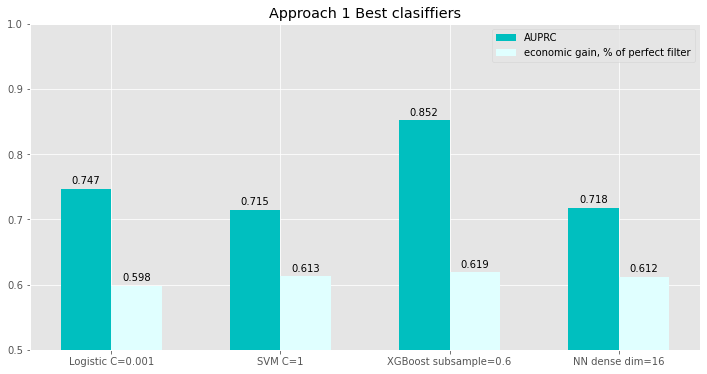

In [400]:
x = np.arange(len(best_reports))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 6))
AUPRC = ax.bar(x-width/2, best_reports['AUPRC'].astype(float), width, label='AUPRC', color='c')
max_gain = ax.bar(x+width/2, best_reports['max_gain'].astype(float), width, 
                  label='economic gain, % of perfect filter', color='lightcyan')

ax.set_title('Approach 1 Best clasiffiers')
ax.set_ylim(0.5,1)
ax.set_xticks(x)
ax.set_xticklabels(best_reports['classifier'])#, rotation=60)
ax.legend(loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', xy=(rect.get_x()+.5*rect.get_width(), height), xytext=(0,3), 
                                     textcoords="offset points", ha='center', va='bottom')
autolabel(AUPRC)
autolabel(max_gain)
plt.show()

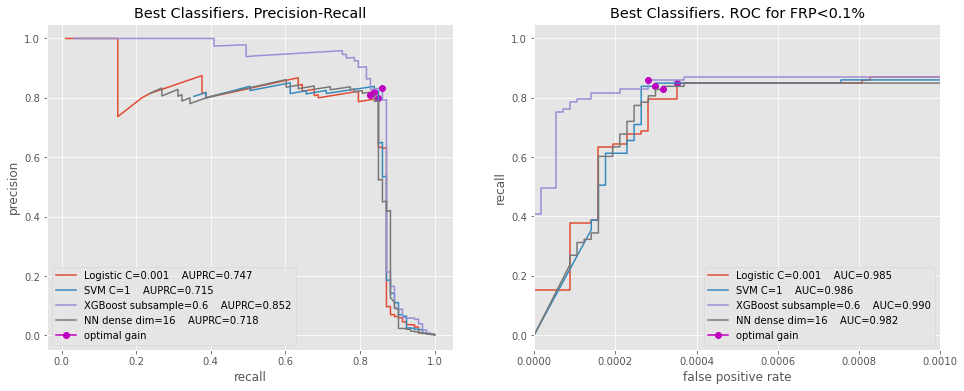

In [401]:
plot_classifiers('Best Classifiers', classifiers_best, Y_hats_best)

### Approach -- 2 

In [402]:
dataset = pd.read_csv('creditcard.csv')
dataset

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [403]:
X = dataset.drop(labels='Class', axis=1)
y = dataset.loc[:,'Class']               


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [404]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [405]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [406]:
mutual_infos.sort_values(ascending=False)

V14       0.535044
V10       0.464775
V12       0.456052
V17       0.438193
V4        0.427427
V11       0.404040
Amount    0.392909
V3        0.387187
V16       0.335317
V7        0.304171
V2        0.291484
V9        0.256678
Time      0.247989
V21       0.235010
V27       0.229914
V1        0.220736
V18       0.198262
V8        0.174371
V6        0.171973
V28       0.170495
V5        0.157362
V20       0.107488
V19       0.099836
V23       0.067332
V24       0.063567
V26       0.046974
V25       0.031606
V22       0.031539
V13       0.024931
V15       0.022442
dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

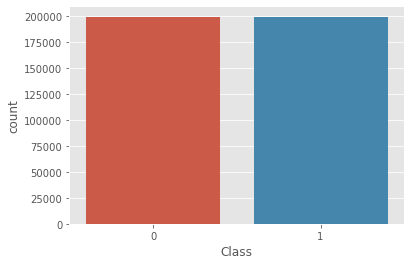

In [407]:
sns.countplot(y_res)

Hence, we can say that the most correlated features after resolving class imbalance using Synthetic Minority Oversampling are V14, V10, V4, V12 and V17.

In [408]:

def grid_eval(grid_clf):
   
   
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)
    
def evaluation(y_test, grid_clf, X_test):
    
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

In [409]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler(copy=False)),
                                       ('model',
                                        SGDClassifier(random_state=1,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00,...
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                          'model__class_weight': [None, 'balanced'],
                          'model__loss': ['hinge']}],
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [410]:
grid_eval(grid_sgd)

Best Score 0.9560162686072134
Best Parameter {'model__alpha': 0.001, 'model__loss': 'log', 'model__penalty': 'l1'}


In [411]:
# Evaluation of SGD
evaluation(y_test, grid_sgd, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.91      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.95      0.62     85443
weighted avg       1.00      0.99      0.99     85443

AUC-ROC
0.9479720619851928
F1-Score
0.2460973370064279
Accuracy
0.990391254988706


In [412]:
y_score = grid_sgd.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.8144301352625484


In [413]:
row1 = {'classifier_name':"SGD Tuned with GridSearchCSV",'AUC':0.990, 'AUPRC':auc_precision_recall}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC    AUPRC
0               Logistic C=0.001  0.985  0.74700
1                Logistic C=0.01  0.989  0.74200
2                 Logistic C=0.1  0.989  0.73100
3                   Logistic C=1  0.987  0.70100
4                     SVM C=0.01  0.988  0.71800
5                      SVM C=0.1  0.990  0.73400
6                        SVM C=1  0.986  0.71500
7                       SVM C=10  0.985  0.69900
8          XGBoost subsample=0.5  0.989  0.84500
9          XGBoost subsample=0.6  0.990  0.85200
10         XGBoost subsample=0.7  0.988  0.84600
11         XGBoost subsample=0.8  0.988  0.84400
12         XGBoost subsample=0.9  0.987  0.84400
13               NN dense dim=16  0.982  0.71800
14               NN dense dim=32  0.981  0.71600
15               NN dense dim=64  0.984  0.72200
16              NN dense dim=128  0.985  0.72400
17       XGBoost + 4-dim Autoenc  0.971  0.69000
18                      Stacking  0.984  0.79000
19  SGD Tuned with GridSearchCSV  0.990  0.81443

In [414]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [415]:
grid_eval(grid_rf)

Best Score 0.9997538267139271
Best Parameter {'model__n_estimators': 75}


In [416]:
# Evaluation of Grid Random Forest
evaluation(y_test, grid_rf, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      0.23      0.37       148

    accuracy                           1.00     85443
   macro avg       1.00      0.61      0.69     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.6148648648648649
F1-Score
0.37362637362637363
Accuracy
0.9986657771847899


In [417]:
y_score = grid_rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.5979971162286396


In [418]:
row1 = {'classifier_name':"RF Tuned with GridSearchCSV",'AUC':0.998, 'AUPRC':auc_precision_recall}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC     AUPRC
0               Logistic C=0.001  0.985  0.747000
1                Logistic C=0.01  0.989  0.742000
2                 Logistic C=0.1  0.989  0.731000
3                   Logistic C=1  0.987  0.701000
4                     SVM C=0.01  0.988  0.718000
5                      SVM C=0.1  0.990  0.734000
6                        SVM C=1  0.986  0.715000
7                       SVM C=10  0.985  0.699000
8          XGBoost subsample=0.5  0.989  0.845000
9          XGBoost subsample=0.6  0.990  0.852000
10         XGBoost subsample=0.7  0.988  0.846000
11         XGBoost subsample=0.8  0.988  0.844000
12         XGBoost subsample=0.9  0.987  0.844000
13               NN dense dim=16  0.982  0.718000
14               NN dense dim=32  0.981  0.716000
15               NN dense dim=64  0.984  0.722000
16              NN dense dim=128  0.985  0.724000
17       XGBoost + 4-dim Autoenc  0.971  0.690000
18                      Stacking  0.984  0.790000
19  SGD Tuned with GridSearchCSV  0.990  0.814430
20   RF Tuned with GridSearchCSV  0.998  0.597997

In [419]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [420]:
grid_eval(grid_lr)

Best Score 0.959816277887179
Best Parameter {'model__class_weight': None, 'model__penalty': 'l2'}


In [421]:
# Evaluation of Grid Linear Regression
evaluation(y_test, grid_lr, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.58      0.61      0.59       148

    accuracy                           1.00     85443
   macro avg       0.79      0.80      0.80     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.8036730235129906
F1-Score
0.594059405940594
Accuracy
0.9985604438046417


In [422]:
y_score = grid_lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.49172545243708093


In [423]:
row1 = {'classifier_name':"LR Tuned with GridSearchCSV",'AUC':0.990, 'AUPRC':auc_precision_recall}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC     AUPRC
0               Logistic C=0.001  0.985  0.747000
1                Logistic C=0.01  0.989  0.742000
2                 Logistic C=0.1  0.989  0.731000
3                   Logistic C=1  0.987  0.701000
4                     SVM C=0.01  0.988  0.718000
5                      SVM C=0.1  0.990  0.734000
6                        SVM C=1  0.986  0.715000
7                       SVM C=10  0.985  0.699000
8          XGBoost subsample=0.5  0.989  0.845000
9          XGBoost subsample=0.6  0.990  0.852000
10         XGBoost subsample=0.7  0.988  0.846000
11         XGBoost subsample=0.8  0.988  0.844000
12         XGBoost subsample=0.9  0.987  0.844000
13               NN dense dim=16  0.982  0.718000
14               NN dense dim=32  0.981  0.716000
15               NN dense dim=64  0.984  0.722000
16              NN dense dim=128  0.985  0.724000
17       XGBoost + 4-dim Autoenc  0.971  0.690000
18                      Stacking  0.984  0.790000
19  SGD Tuned with GridSearchCSV  0.990  0.814430
20   RF Tuned with GridSearchCSV  0.998  0.597997
21   LR Tuned with GridSearchCSV  0.990  0.491725

In [424]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]}
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__p': [2]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [425]:
grid_eval(grid_knn)

Best Score 0.9980623930056313
Best Parameter {'model__p': 2}


In [426]:
#Evaluation of Grid KNN(K-Nearest Neighbour)
evaluation(y_test, grid_knn, X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.22      0.09      0.13       148

    accuracy                           1.00     85443
   macro avg       0.61      0.55      0.57     85443
weighted avg       1.00      1.00      1.00     85443

AUC-ROC
0.5469983348727706
F1-Score
0.13145539906103285
Accuracy
0.9978348138525098


In [427]:
y_score = grid_knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.10805185112860122


In [428]:
row1 = {'classifier_name':"KNN Tuned with GridSearchCSV",'AUC':0.998, 'AUPRC':auc_precision_recall}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC     AUPRC
0               Logistic C=0.001  0.985  0.747000
1                Logistic C=0.01  0.989  0.742000
2                 Logistic C=0.1  0.989  0.731000
3                   Logistic C=1  0.987  0.701000
4                     SVM C=0.01  0.988  0.718000
5                      SVM C=0.1  0.990  0.734000
6                        SVM C=1  0.986  0.715000
7                       SVM C=10  0.985  0.699000
8          XGBoost subsample=0.5  0.989  0.845000
9          XGBoost subsample=0.6  0.990  0.852000
10         XGBoost subsample=0.7  0.988  0.846000
11         XGBoost subsample=0.8  0.988  0.844000
12         XGBoost subsample=0.9  0.987  0.844000
13               NN dense dim=16  0.982  0.718000
14               NN dense dim=32  0.981  0.716000
15               NN dense dim=64  0.984  0.722000
16              NN dense dim=128  0.985  0.724000
17       XGBoost + 4-dim Autoenc  0.971  0.690000
18                      Stacking  0.984  0.790000
19  SGD Tuned with GridSearchCSV  0.990  0.814430
20   RF Tuned with GridSearchCSV  0.998  0.597997
21   LR Tuned with GridSearchCSV  0.990  0.491725
22  KNN Tuned with GridSearchCSV  0.998  0.108052

### Approach 3

In [429]:
dataset = pd.read_csv('creditcard.csv')

In [430]:
seed = 51
tf.random.set_seed(seed)
random.seed(seed)

In [431]:
scaler = RobustScaler()

dataset['scaled_amount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)
     

Along with having a common metric, AUPRC, for comparison, it is important to have the same test data to run the metric against. So how about we all use the following approach

In [432]:
train_dataset, test_dataset = train_test_split(dataset, stratify=dataset['Class'], test_size=0.2, random_state=51)

In [433]:
train_dataset, validation_dataset = train_test_split(train_dataset, stratify=train_dataset['Class'], test_size=0.2, random_state=51)

In [434]:
print(train_dataset.shape, validation_dataset.shape, test_dataset.shape)

(182276, 31) (45569, 31) (56962, 31)


In [435]:
print(100*train_dataset.shape[0]/dataset.shape[0], 100*validation_dataset.shape[0]/dataset.shape[0], 100*test_dataset.shape[0]/dataset.shape[0])

63.99983146481652 15.99995786620413 20.000210668979342


In [436]:
train_labels = train_dataset.pop('Class')
validation_labels = validation_dataset.pop('Class')
test_labels = test_dataset.pop('Class')

In [437]:
def build_model():
  tf.keras.backend.clear_session()

  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.BatchNormalization(),
    layers.Dropout(0.33),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.33),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.33),
    layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.AUC(curve='ROC', name='auroc'), 
                          tf.keras.metrics.AUC(curve='PR', name='auprc')])
  
  model.summary()

  return model

In [438]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2

In [439]:
checkpoint_filepath = 'Credit-Card-Fraud-Detection-v3.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_auprc', mode='max', save_best_only=True)


     

In [440]:
EPOCHS = 120
BATCH_SIZE = 256

history_v3 = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, 
  validation_data = (validation_dataset, validation_labels), 
  batch_size=BATCH_SIZE,
  verbose=2,
  callbacks=[model_checkpoint]
  )

Epoch 1/120
713/713 - 12s - loss: 0.1947 - auroc: 0.7163 - auprc: 0.0678 - val_loss: 0.0130 - val_auroc: 0.9109 - val_auprc: 0.7139
Epoch 2/120
713/713 - 4s - loss: 0.0119 - auroc: 0.8637 - auprc: 0.4802 - val_loss: 0.0064 - val_auroc: 0.9365 - val_auprc: 0.7533
Epoch 3/120
713/713 - 4s - loss: 0.0070 - auroc: 0.9148 - auprc: 0.5917 - val_loss: 0.0052 - val_auroc: 0.9302 - val_auprc: 0.7463
Epoch 4/120
713/713 - 4s - loss: 0.0059 - auroc: 0.9220 - auprc: 0.6429 - val_loss: 0.0044 - val_auroc: 0.9366 - val_auprc: 0.7694
Epoch 5/120
713/713 - 4s - loss: 0.0052 - auroc: 0.9202 - auprc: 0.6772 - val_loss: 0.0041 - val_auroc: 0.9303 - val_auprc: 0.7548
Epoch 6/120
713/713 - 4s - loss: 0.0048 - auroc: 0.9303 - auprc: 0.6733 - val_loss: 0.0039 - val_auroc: 0.9429 - val_auprc: 0.7878
Epoch 7/120
713/713 - 4s - loss: 0.0044 - auroc: 0.9369 - auprc: 0.6958 - val_loss: 0.0036 - val_auroc: 0.9429 - val_auprc: 0.7884
Epoch 8/120
713/713 - 4s - loss: 0.0044 - auroc: 0.9192 - auprc: 0.6903 - val_loss

In [441]:
def compute_metrics(y_true, y_pred):
  tp = tf.keras.metrics.TruePositives()
  tp.update_state(y_true, y_pred)
  tp = int(tp.result().numpy())
  fp = tf.keras.metrics.FalsePositives()
  fp.update_state(y_true, y_pred)
  fp = int(fp.result().numpy())
  tn = tf.keras.metrics.TrueNegatives()
  tn.update_state(y_true, y_pred)
  tn = int(tn.result().numpy())
  fn = tf.keras.metrics.FalseNegatives()
  fn.update_state(y_true, y_pred)
  fn = int(fn.result().numpy())
  return [tp, fn, fp, tn]

In [442]:
def print_metrics(metrics):
  print('Fraudulent Transactions Detected (True Positives): ' + str(metrics[0]))
  print('Fraudulent Transactions Missed (False Negatives): ' + str(metrics[1]))
  print('Legitimate Transactions Incorrectly Detected (False Positives): ' + str(metrics[2]))
  print('Legitimate Transactions Detected (True Negatives): ' + str(metrics[3]))

In [443]:
def plot_results(history):
  history = history.history

  fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

  ax1.plot(history['loss'], label='Train loss')
  ax1.plot(history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('Loss')

  ax2.plot(history['auprc'], label='Train AUPRC')
  ax2.plot(history['val_auprc'], label='Validation AUPRC')
  ax2.legend(loc='best')
  ax2.set_title('AUPRC')

  plt.xlabel('Epochs')
  sns.despine()
  plt.show()

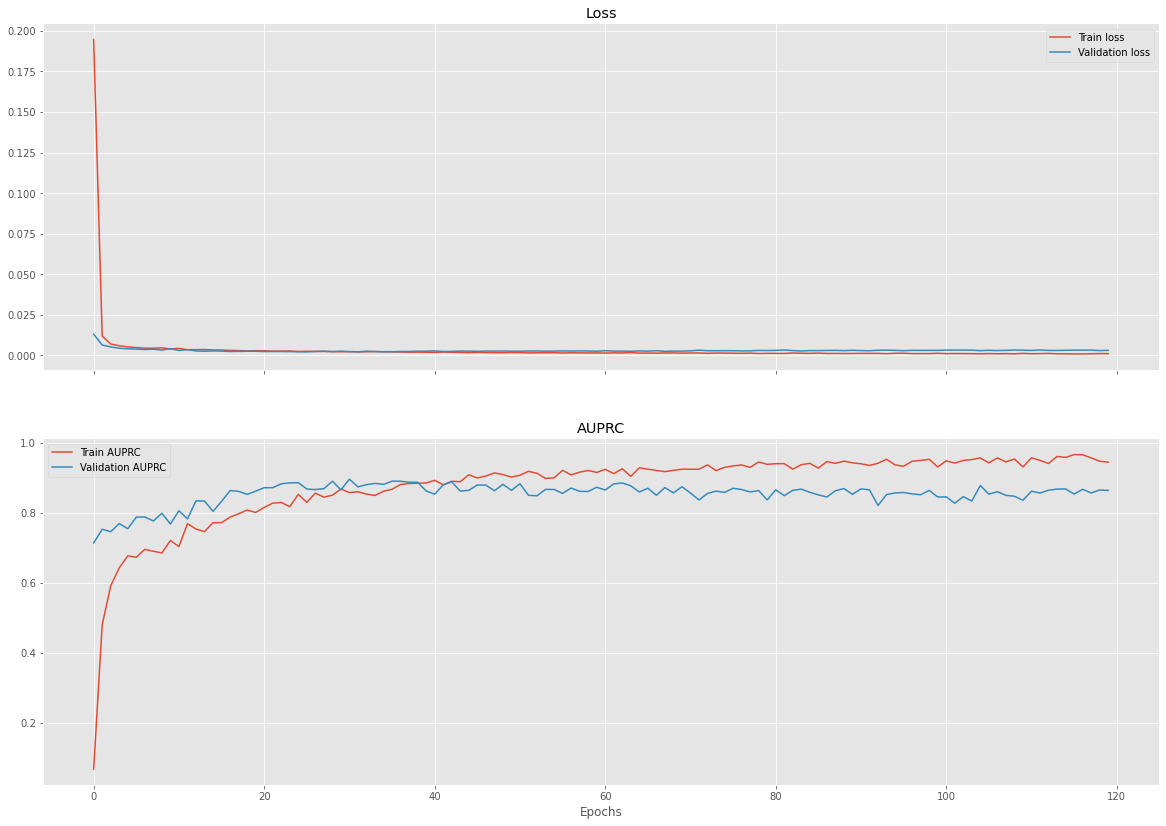

In [444]:
plot_results(history_v3)

In [445]:
y_pred = model.predict(test_dataset)
auprc = tf.keras.metrics.AUC(curve='PR')
auprc.update_state(test_labels, y_pred)
TF_Model_AUPRC = auprc.result().numpy()
TF_Model_AUPRC

0.7890331

In [446]:
TF_Model_metrics = compute_metrics(test_labels, y_pred)
print_metrics(TF_Model_metrics)

Fraudulent Transactions Detected (True Positives): 77
Fraudulent Transactions Missed (False Negatives): 21
Legitimate Transactions Incorrectly Detected (False Positives): 6
Legitimate Transactions Detected (True Negatives): 56858


## Final Models out of all three Approaches

In [447]:
row1 = {'classifier_name':"Customised Neural Networks",'AUC':0.988, 'AUPRC':TF_Model_AUPRC}

modelcompar = modelcompar.append(row1, ignore_index=True)
modelcompar

classifier_name    AUC     AUPRC
0               Logistic C=0.001  0.985  0.747000
1                Logistic C=0.01  0.989  0.742000
2                 Logistic C=0.1  0.989  0.731000
3                   Logistic C=1  0.987  0.701000
4                     SVM C=0.01  0.988  0.718000
5                      SVM C=0.1  0.990  0.734000
6                        SVM C=1  0.986  0.715000
7                       SVM C=10  0.985  0.699000
8          XGBoost subsample=0.5  0.989  0.845000
9          XGBoost subsample=0.6  0.990  0.852000
10         XGBoost subsample=0.7  0.988  0.846000
11         XGBoost subsample=0.8  0.988  0.844000
12         XGBoost subsample=0.9  0.987  0.844000
13               NN dense dim=16  0.982  0.718000
14               NN dense dim=32  0.981  0.716000
15               NN dense dim=64  0.984  0.722000
16              NN dense dim=128  0.985  0.724000
17       XGBoost + 4-dim Autoenc  0.971  0.690000
18                      Stacking  0.984  0.790000
19  SGD Tuned with GridSearchCSV  0.990  0.814430
20   RF Tuned with GridSearchCSV  0.998  0.597997
21   LR Tuned with GridSearchCSV  0.990  0.491725
22  KNN Tuned with GridSearchCSV  0.998  0.108052
23    Customised Neural Networks  0.988  0.789033

### Out of the parametered variants these found to be the best from the best classifiers list so removing the test except these ot of the 1st approach

Logistic C=0.001

SVM C=1

XGBoost subsample=0.6

NN dense dim=16

In [448]:
modelcompar.drop(modelcompar.index[[1,2,3,4,5,7,8,10,11,12,14,15,16,17]], inplace=True)

In [449]:
modelcompar

classifier_name    AUC     AUPRC
0               Logistic C=0.001  0.985  0.747000
6                        SVM C=1  0.986  0.715000
9          XGBoost subsample=0.6  0.990  0.852000
13               NN dense dim=16  0.982  0.718000
18                      Stacking  0.984  0.790000
19  SGD Tuned with GridSearchCSV  0.990  0.814430
20   RF Tuned with GridSearchCSV  0.998  0.597997
21   LR Tuned with GridSearchCSV  0.990  0.491725
22  KNN Tuned with GridSearchCSV  0.998  0.108052
23    Customised Neural Networks  0.988  0.789033

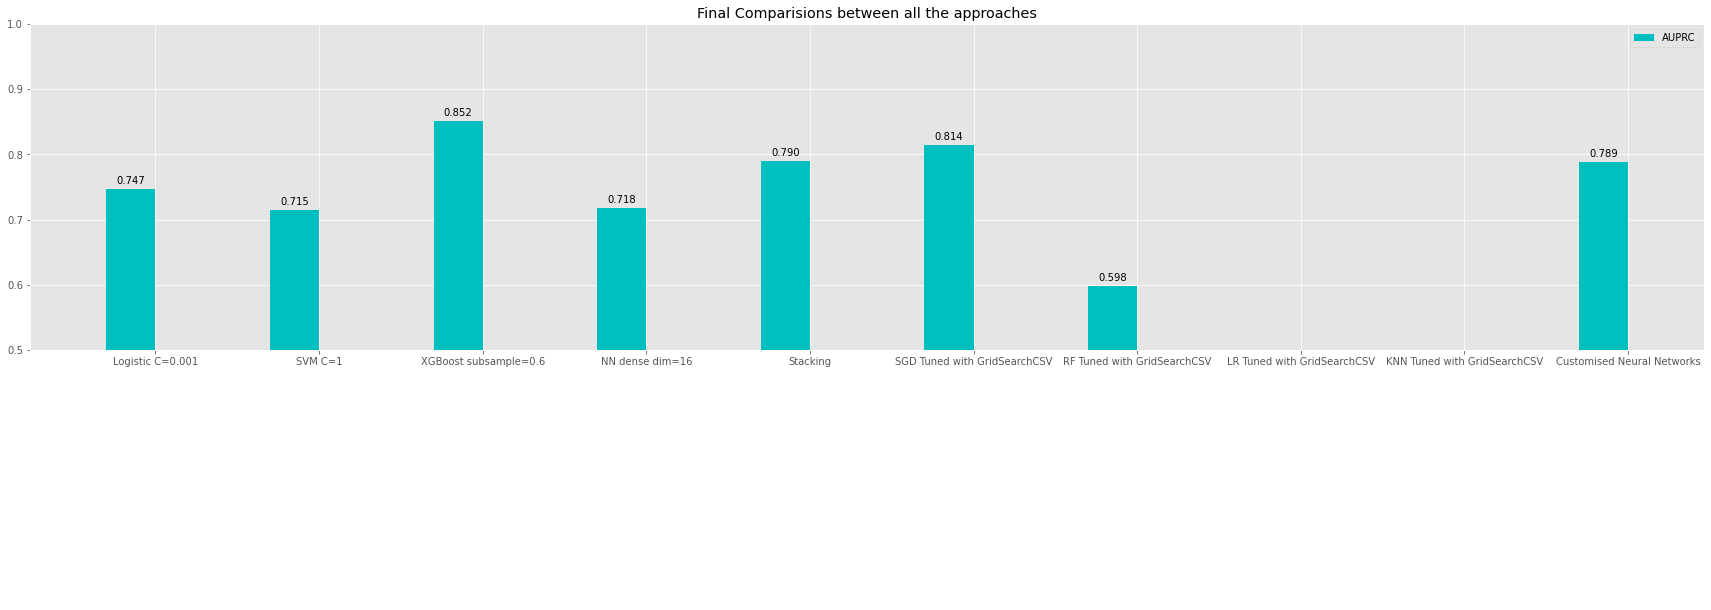

In [450]:
x = np.arange(len(modelcompar))
width = 0.3

fig, ax = plt.subplots(figsize=(30, 6))
AUPRC = ax.bar(x-width/2, modelcompar['AUPRC'].astype(float), width, label='AUPRC', color='c')

ax.set_title('Final Comparisions between all the approaches')
ax.set_ylim(0.5,1)
ax.set_xticks(x)
ax.set_xticklabels(modelcompar['classifier_name'])#, rotation=60)
ax.legend(loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}', xy=(rect.get_x()+.5*rect.get_width(), height), xytext=(0,3), 
                                     textcoords="offset points", ha='center', va='bottom')
autolabel(AUPRC)
# fig.tight_layout()
plt.show()

---------------------------------------------------------------------------------------------------------------------------

## Based on the Average Precision, Recall Score XG Boost has the highest score hence can be considered as the best model of al the other models

---------------------------------------------------------------------------------------------------------------------------